In [1]:
import sys, os
sys.path.append("/Users/1nao/GitHub/BayesML-alpha")

import numpy as np
import os
from bayesml import metatree
from bayesml import normal
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.notebook import tqdm
from collections import Counter
import pathlib
from copy import deepcopy
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
SEED = 0
rng = np.random.default_rng(SEED)
np.random.seed(SEED)
MODEL_SEED = 0 # Seed for the learnmodel

In [3]:
FILE_DIR = pathlib.Path().resolve() / 'metatree_experiment_code' / '2501_gb_nexttree'
FIG_DIR = pathlib.Path().resolve() / 'metatree_experiment_code' / '2501_gb_nexttree' / 'fig'
TREE_FIG_DIR = FIG_DIR / 'tree'
ERROR_ARR_SAVE_DIR = FILE_DIR / 'error_array'

In [4]:
DATA_NAMES = [
    'Mpg',
    'abalone',
    'ais',
    'automobile',
    'baseball',
    'baskball',
    'boston',
    'budget',
    'cps',
    'cpu',
    'diabetes',
    'diamond',
    'liver',
    'ozone',
    'ozone_spss',
    'servo',
    'strikes',
    'student',
    'wine_quality',
    'california'
]

In [5]:
MODELNAME_LIST = [
    # 'MT5',
    # 'MT',
    # 'all_DT5',
    # 'all_DT', 
    # 'GB5',
    # 'GB'
    # 'GB_metaization2',
    # 'MTGB5',
    'MTGB5_depth5',
    'GB5_depth5',
    'GB_metaization5_depth5',
    'MTGB5_depth15',
    'GB5_depth15',
    'GB_metaization5_depth15',
    'MTGB100_depth5',
    'GB100_depth5',
    'GB_metaization100_depth5',
    'MTGB100_depth15',
    'GB100_depth15',
    'GB_metaization100_depth15',
    ]

# read and calculate errors

In [6]:
# load the error arrays
err_dict = {}
for data_name in DATA_NAMES:
    err_dict[data_name] = {}
    for modelname in MODELNAME_LIST:
        try:
            err_dict[data_name][modelname] = {
                'train_mse_arr': np.load(ERROR_ARR_SAVE_DIR / f'{data_name}_{modelname}_train_mse.npy'),
                'test_mse_arr': np.load(ERROR_ARR_SAVE_DIR / f'{data_name}_{modelname}_test_mse.npy'),
                }
        except:
            print(f'{data_name}_{modelname} does not exist.')
            err_dict[data_name][modelname] = None

In [7]:
# calculate the average and standard error of the mean
res_dict = {}
for data_name in DATA_NAMES:
    res_dict[data_name] = {}
    for modelname in MODELNAME_LIST:
        if err_dict[data_name][modelname] is None:
            res_dict[data_name][modelname] = None
            continue
        res_dict[data_name][modelname] = {
            'train_ms_avg': np.mean(err_dict[data_name][modelname]['train_mse_arr']),
            'train_mse_sem': np.std(err_dict[data_name][modelname]['train_mse_arr']) / np.sqrt(len(err_dict[data_name][modelname]['train_mse_arr'])),
            'test_mse_avg': np.mean(err_dict[data_name][modelname]['test_mse_arr']),
            'test_mse_sem': np.std(err_dict[data_name][modelname]['test_mse_arr']) / np.sqrt(len(err_dict[data_name][modelname]['test_mse_arr'])),
        }

In [8]:
# create a dataframe
# multicolumn of model and train/test mse/sem
model_list = []
for modelname in MODELNAME_LIST:
    model_list += [modelname]*4
mse_sem_list = ['train_mse_avg', 'train_mse_sem', 'test_mse_avg', 'test_mse_sem']
mse_sem_list = mse_sem_list * len(MODELNAME_LIST)
multi_columns = pd.MultiIndex.from_tuples(list(zip(model_list, mse_sem_list)))
df1 = pd.DataFrame(columns=multi_columns, index=DATA_NAMES)

for data_name in DATA_NAMES:
    for modelname in MODELNAME_LIST:
        if res_dict[data_name][modelname] is None:
            continue
        df1.loc[data_name, (modelname, 'train_mse_avg')] = res_dict[data_name][modelname]['train_ms_avg']
        df1.loc[data_name, (modelname, 'train_mse_sem')] = res_dict[data_name][modelname]['train_mse_sem']
        df1.loc[data_name, (modelname, 'test_mse_avg')] = res_dict[data_name][modelname]['test_mse_avg']
        df1.loc[data_name, (modelname, 'test_mse_sem')] = res_dict[data_name][modelname]['test_mse_sem']
df1

MTGB5_depth5                                          \
             train_mse_avg train_mse_sem test_mse_avg test_mse_sem   
Mpg               0.044641       0.00047     0.154348     0.011857   
abalone           0.346699      0.002668     0.479613     0.007764   
ais               0.017228      0.000284     0.051893     0.004313   
automobile        0.030682       0.00084     0.247998     0.028638   
baseball          0.042915      0.000616     0.524467     0.054219   
baskball          0.080945      0.001807     0.953426     0.061793   
boston            0.040144      0.000535     0.182241     0.019102   
budget            0.004986      0.000101     0.010699     0.001612   
cps               0.294881      0.006393     0.840055     0.073501   
cpu               0.024162      0.000439     0.150942      0.02739   
diabetes          0.145979      0.003642     0.697806     0.017463   
diamond            0.01931      0.000282      0.04592     0.007515   
liver             0.236794      0.007128     1.018336      0.06674   
ozone             0.069864      0.001543     0.337138     0.019512   
ozone_spss        0.070924      0.002198     0.319913       0.0234   
servo             0.039726      0.000745     0.135223     0.043454   
strikes           0.172403      0.010171      1.17633     0.164278   
student           0.247283      0.004897     0.994885     0.029196   
wine_quality      0.502113      0.001973     0.636999     0.011468   
california        0.226687      0.001685     0.252322     0.004243   

                GB5_depth5                                          \
             train_mse_avg train_mse_sem test_mse_avg test_mse_sem   
Mpg               0.024148      0.000518     0.154197     0.009574   
abalone           0.344245      0.002354     0.481936     0.007469   
ais               0.001761      0.000039     0.035497     0.004038   
automobile        0.004145      0.000476     0.266053     0.035418   
baseball          0.020958       0.00092     0.535906     0.059377   
baskball          0.028574      0.002608     0.939772     0.051537   
boston            0.025121      0.000442     0.182786     0.022939   
budget            0.002316      0.000108     0.007301     0.001407   
cps                0.28439      0.006554     0.860894     0.081614   
cpu               0.009389      0.000301     0.152222     0.033687   
diabetes          0.138839      0.003609     0.689128     0.020696   
diamond           0.003753      0.000081     0.026353     0.003656   
liver             0.225182      0.007952     1.007687     0.052706   
ozone             0.046795      0.001156     0.355252      0.01972   
ozone_spss        0.049324      0.001818     0.326587     0.024072   
servo             0.009815      0.000672     0.118297     0.043168   
strikes           0.144324      0.008161     1.282724     0.158886   
student            0.24031      0.004763     0.970569     0.023372   
wine_quality      0.498255      0.002445      0.63723     0.011275   
california        0.226363      0.001622     0.252083     0.004072   

             GB_metaization5_depth5                                          \
                      train_mse_avg train_mse_sem test_mse_avg test_mse_sem   
Mpg                        0.052952      0.000651     0.159428     0.011684   
abalone                    0.346045      0.002333     0.480125     0.007682   
ais                        0.034529      0.000531     0.076912     0.008035   
automobile                 0.045179      0.001015       0.2713      0.03249   
baseball                   0.053312      0.000903     0.517544     0.054953   
baskball                   0.103501      0.002704     0.831869     0.047177   
boston                     0.045482      0.000612     0.193062      0.02252   
budget                     0.007681      0.000162      0.01235     0.001418   
cps                        0.296552      0.006614     0.837782     0.077082   
cpu                        0.044035      0.000673     0.185819 

In [9]:
# create a dataframe with the diffrent multi columns

mse_sem_list = []
for val in ['train_mse_avg', 'train_mse_sem', 'test_mse_avg', 'test_mse_sem']:
    mse_sem_list += [val]*len(MODELNAME_LIST)
model_list = MODELNAME_LIST * 4
multi_columns = pd.MultiIndex.from_tuples(list(zip(mse_sem_list,model_list)))
df2 = pd.DataFrame(columns=multi_columns, index=DATA_NAMES)

for data_name in DATA_NAMES:
    for modelname in MODELNAME_LIST:
        if res_dict[data_name][modelname] is None:
            continue
        df2.loc[data_name, ('train_mse_avg', modelname)] = res_dict[data_name][modelname]['train_ms_avg']
        df2.loc[data_name, ('train_mse_sem', modelname)] = res_dict[data_name][modelname]['train_mse_sem']
        df2.loc[data_name, ('test_mse_avg', modelname)] = res_dict[data_name][modelname]['test_mse_avg']
        df2.loc[data_name, ('test_mse_sem', modelname)] = res_dict[data_name][modelname]['test_mse_sem']

# add columns to indicate abs(test_mse_avg(MT)-test_mse_avg(GB)) is less than (test_mse_sem(MT)+test_mse_sem(GB)), that is, the difference is not significant
# df2['diff_test_mse_avg'] = np.abs(df2['test_mse_avg']['MT'] - df2['test_mse_avg']['GB'])
# df2['diff_test_mse_sem'] = df2['test_mse_sem']['MT'] + df2['test_mse_sem']['GB']
# df2['diff_test_mse_avg > diff_test_mse_sem'] = df2['diff_test_mse_avg'] > df2['diff_test_mse_sem']
df2

train_mse_avg                                                  \
              MTGB5_depth5 GB5_depth5 GB_metaization5_depth5 MTGB5_depth15   
Mpg               0.044641   0.024148               0.052952      0.033313   
abalone           0.346699   0.344245               0.346045       0.06366   
ais               0.017228   0.001761               0.034529      0.017543   
automobile        0.030682   0.004145               0.045179        0.0303   
baseball          0.042915   0.020958               0.053312      0.039264   
baskball          0.080945   0.028574               0.103501      0.077021   
boston            0.040144   0.025121               0.045482       0.03424   
budget            0.004986   0.002316               0.007681      0.004852   
cps               0.294881    0.28439               0.296552      0.107492   
cpu               0.024162   0.009389               0.044035      0.024679   
diabetes          0.145979   0.138839               0.146785      0.066986   
diamond            0.01931   0.003753               0.028703      0.019425   
liver             0.236794   0.225182               0.238927      0.078443   
ozone             0.069864   0.046795               0.074613      0.045902   
ozone_spss        0.070924   0.049324               0.075952      0.046385   
servo             0.039726   0.009815               0.049117      0.038348   
strikes           0.172403   0.144324               0.166518      0.047946   
student           0.247283    0.24031               0.249699      0.081124   
wine_quality      0.502113   0.498255               0.499829      0.059906   
california        0.226687   0.226363                0.22652      0.037559   

                                                                              \
             GB5_depth15 GB_metaization5_depth15 MTGB100_depth5 GB100_depth5   
Mpg             0.000977                0.063561       0.039589          0.0   
abalone         0.002904                0.087074       0.140552     0.040851   
ais             0.000976                0.051417       0.009904          0.0   
automobile      0.000973                0.044255       0.021283          0.0   
baseball        0.000976                0.074943       0.034977          0.0   
baskball        0.000972                0.120655       0.064087          0.0   
boston          0.000982                0.063106       0.035012          0.0   
budget          0.000976                0.019707       0.003082     0.000003   
cps             0.028978                0.144011        0.15427     0.028114   
cpu             0.003985                0.054143       0.017954     0.003011   
diabetes        0.000986                0.100814       0.079528          0.0   
diamond         0.000975                0.038073       0.014776          0.0   
liver           0.001005                0.112239       0.100974          0.0   
ozone           0.000976                0.075355       0.058329          0.0   
ozone_spss      0.000978                0.077321       0.056125          0.0   
servo           0.000975                0.057367       0.034666          0.0   
strikes         0.001371                0.074775       0.063576      0.00005   
student         0.001034                0.110776       0.093112          0.0   
wine_quality     0.00569                0.073461       0.135209      0.06411   
california      0.004965                 0.05483       0.084112      0.06437   

                                                                     \
             GB_metaization100_depth5 MTGB100_depth15 GB100_depth15   
Mpg                          0.052858        0.028169           0.0   
abalone                      0.103025        0.062034           0.0   
ais                          0.034491        0.009624           0.0   
automobile                   0.045129         0.01975           0.0   
baseball                     0.053141        0.031091           0.0   
baskball                     0.103251 

In [10]:
assert False

AssertionError: 

# root split probabilities

In [11]:
# load the error arrays
root_split_proba_dict = {}
for data_name in DATA_NAMES:
    root_split_proba_dict[data_name] = {}
    for modelname in MODELNAME_LIST:
        try:
            root_split_proba_dict[data_name][modelname] = np.load(ERROR_ARR_SAVE_DIR / f'{data_name}_{modelname}_root_split_proba_list.npy')
        except:
            root_split_proba_dict[data_name][modelname] = None

In [12]:
root_split_proba_stats = {}
for data_name in DATA_NAMES:
    root_split_proba_stats[data_name] = {}
    for modelname in MODELNAME_LIST:
        if root_split_proba_dict[data_name][modelname] is not None:
            root_split_proba_stats[data_name][modelname] = {
                'mean': np.mean(root_split_proba_dict[data_name][modelname], axis=0),
                'sem': np.std(root_split_proba_dict[data_name][modelname], axis=0) / np.sqrt(root_split_proba_dict[data_name][modelname].shape[0]),
            }
        else:
            root_split_proba_stats[data_name][modelname] = None

In [13]:
data_name = 'Mpg'

In [14]:
def plot_root_split_proba(
    data_name,
    modelname,
):
    num_tree = root_split_proba_stats[data_name][modelname]['mean'].shape[0]
    x = list(range(1, num_tree+1))
    y = root_split_proba_stats[data_name][modelname]['mean']
    yerr = root_split_proba_stats[data_name][modelname]['sem']

    fig = plt.figure(figsize=(20, 6))
    plt.errorbar(x, y, yerr=yerr, fmt='o', label='Root split probability')
    plt.xlabel('Number of trees')
    plt.ylabel('Posterior probability of root node split')
    plt.title(f'{data_name}: {modelname}')
    plt.grid()
    # plt.legend()
    plt.ylim(0, 1.05)
    plt.show()

# plot_root_split_proba('Mpg','MTGB5')

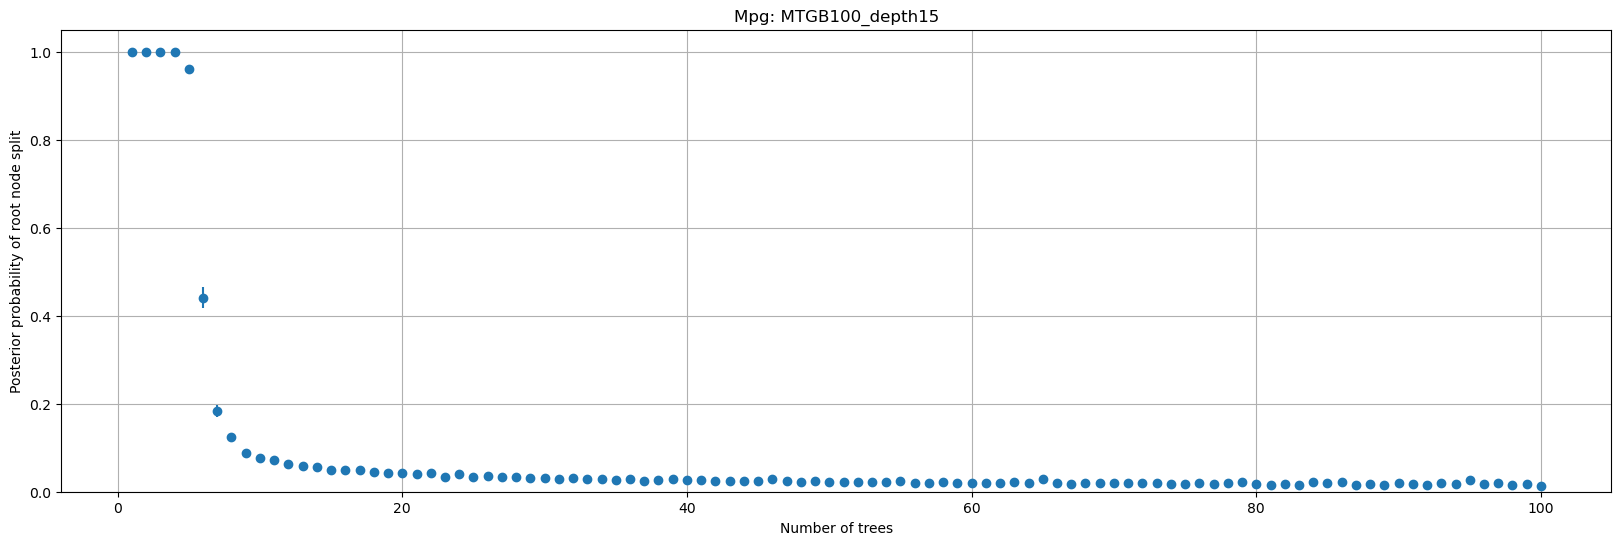

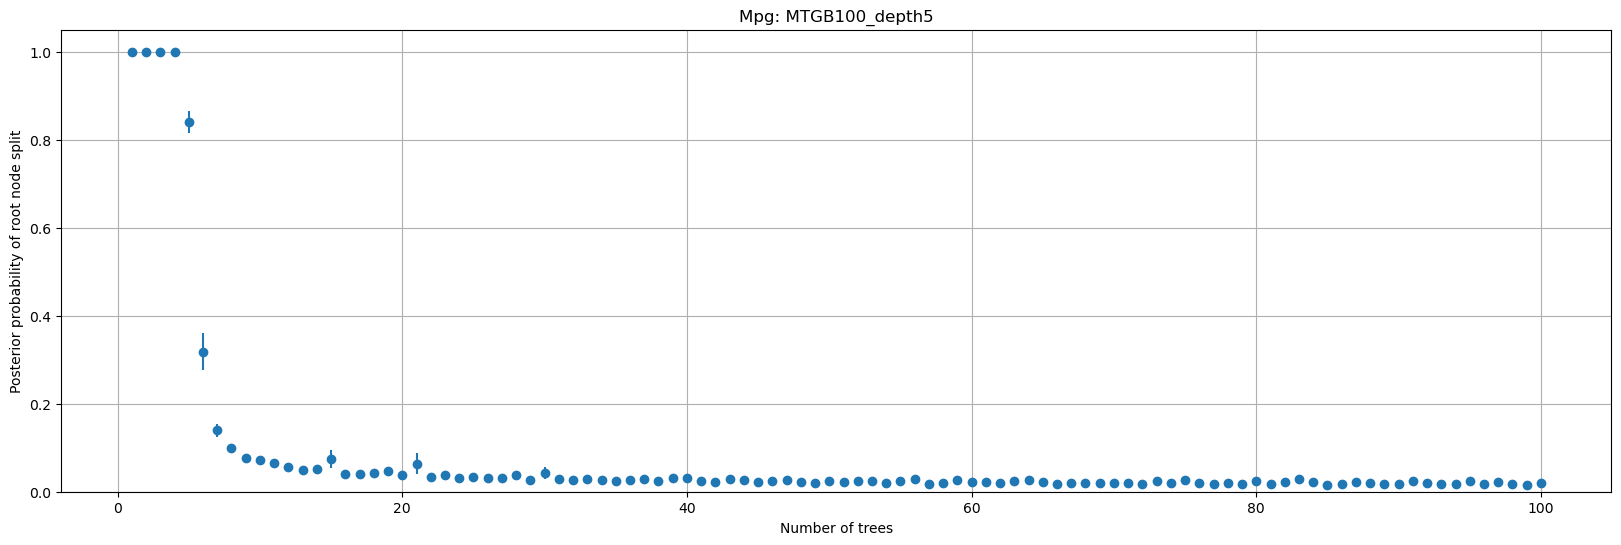

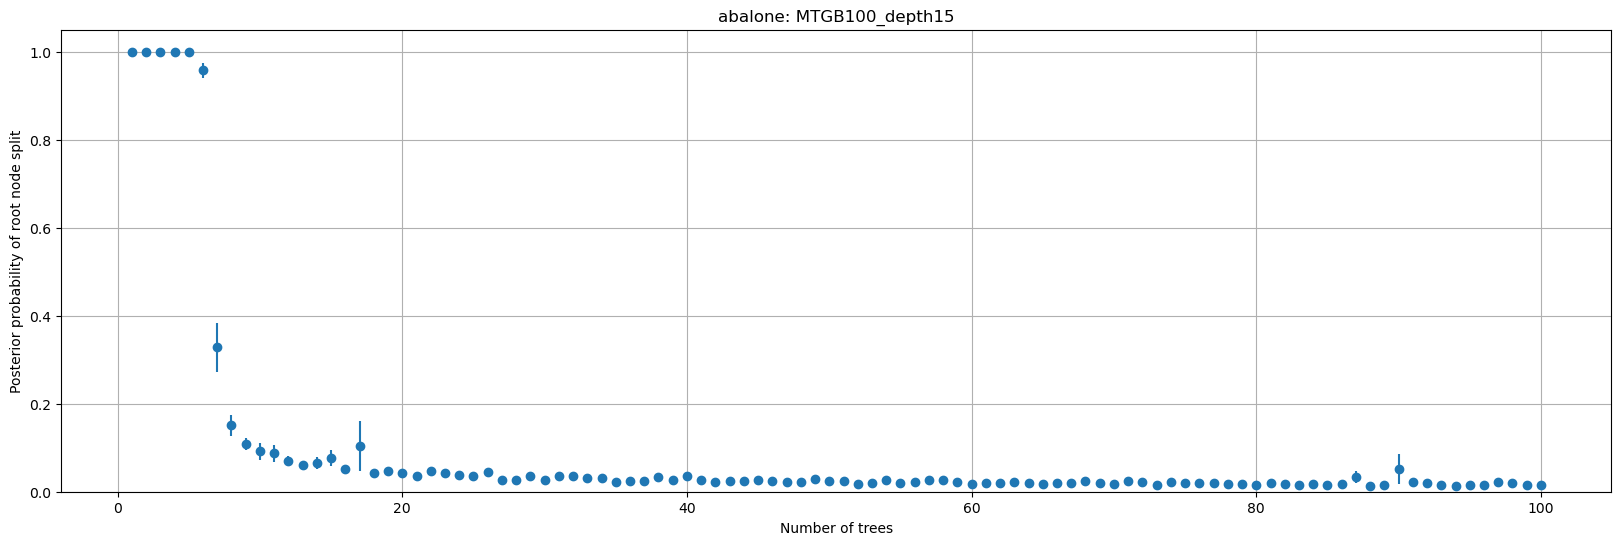

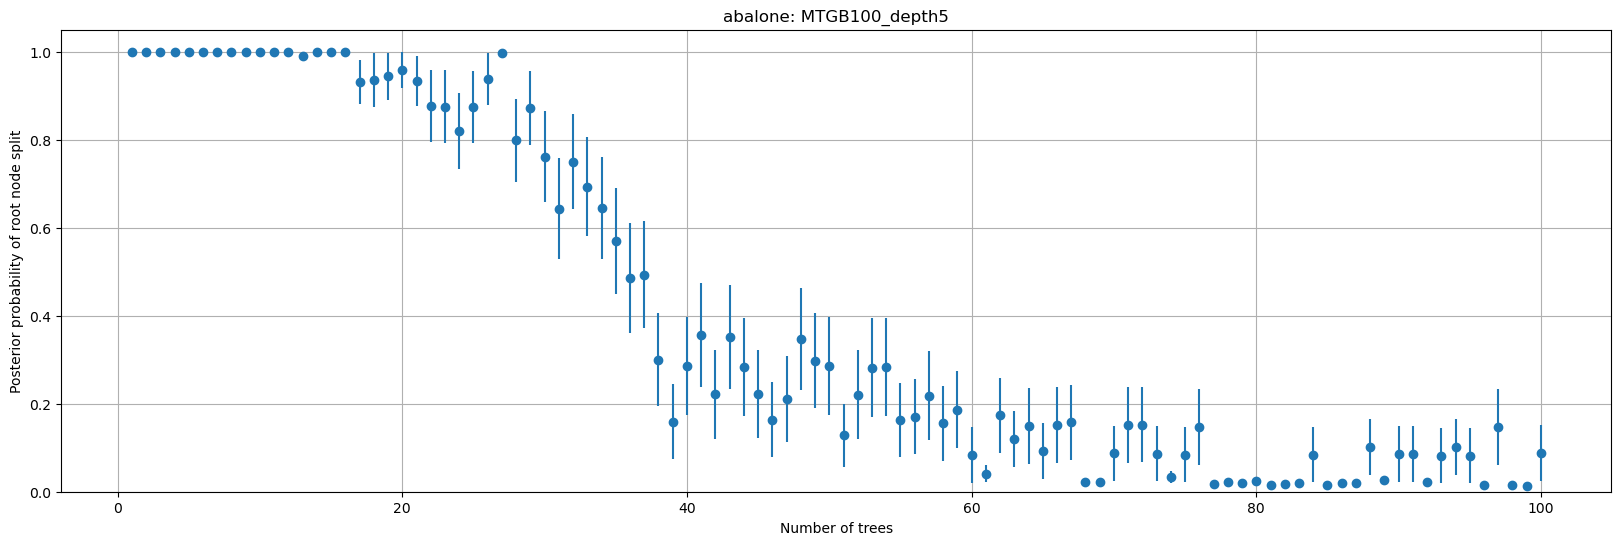

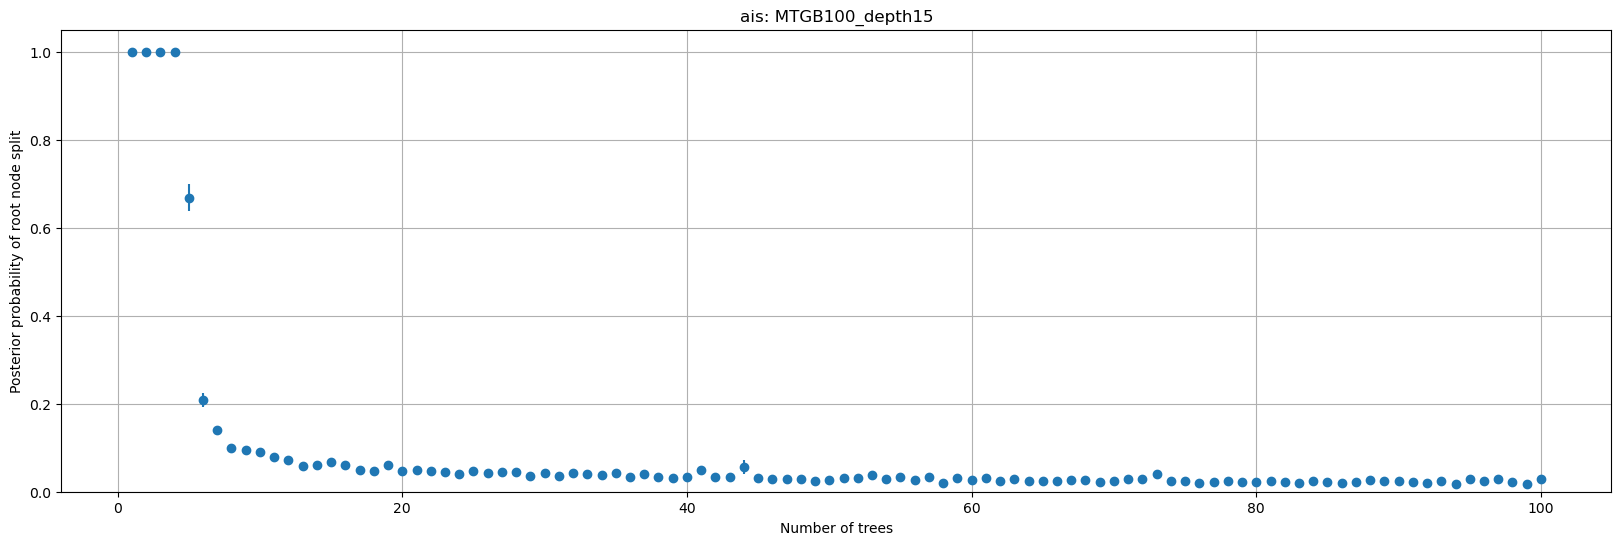

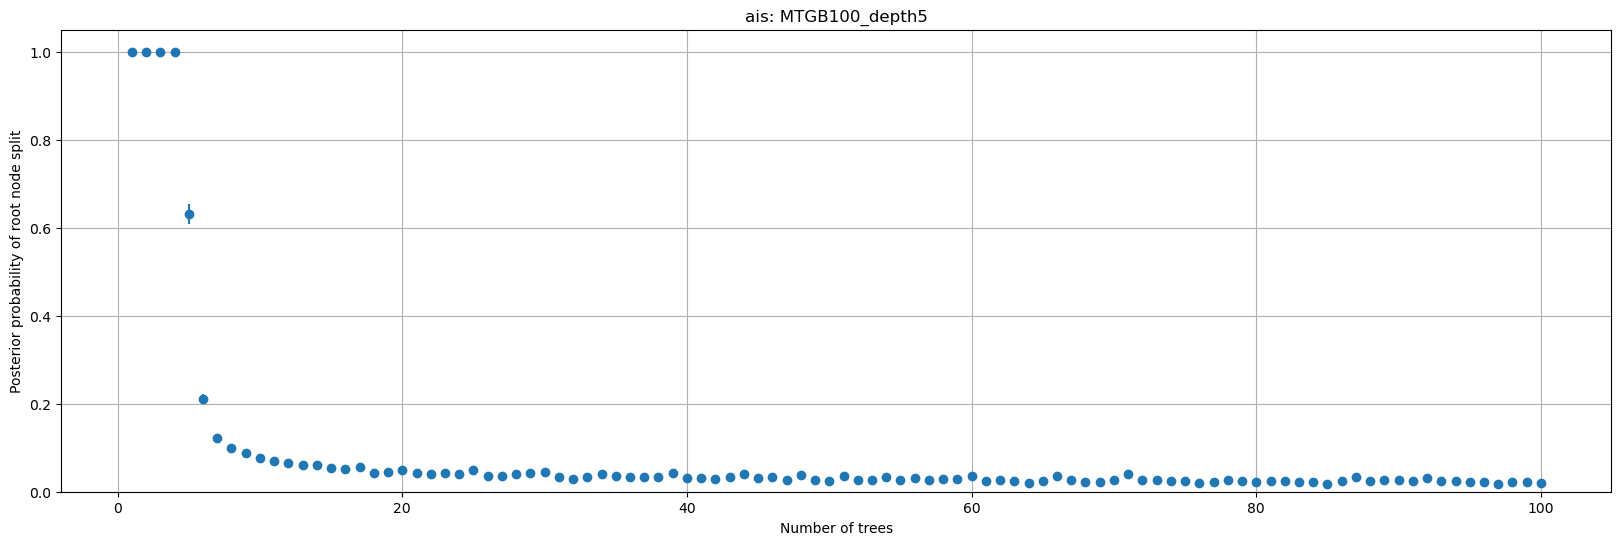

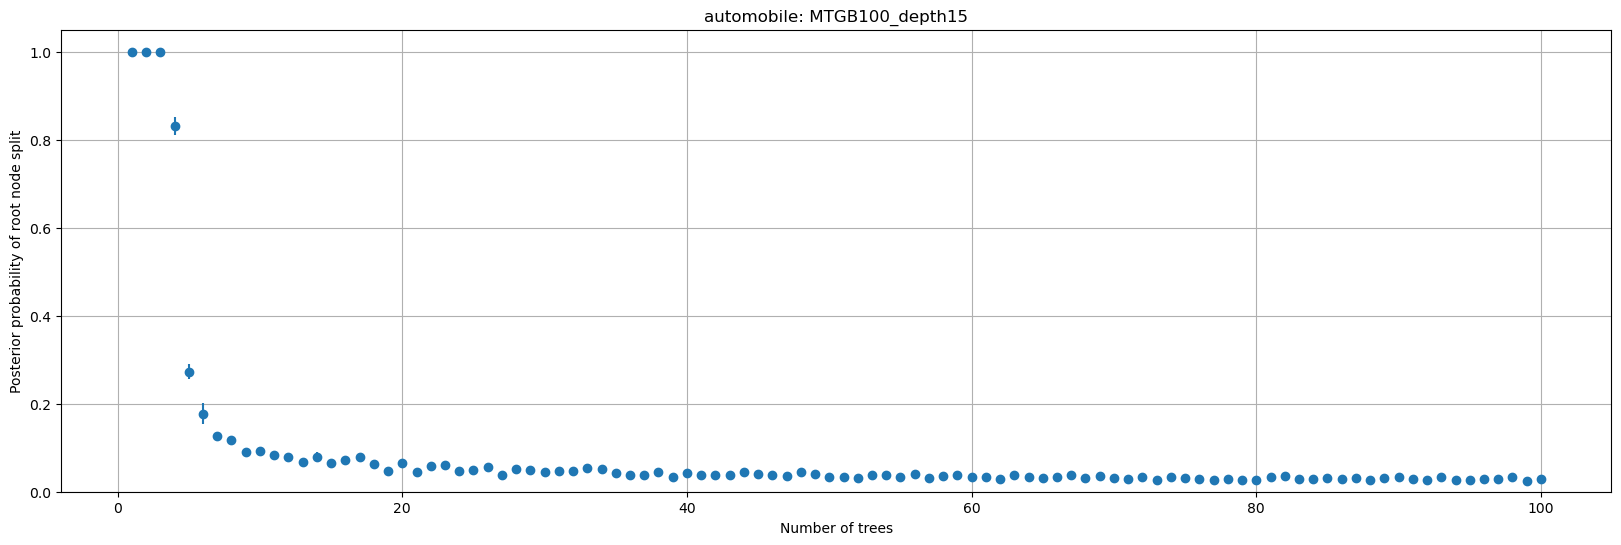

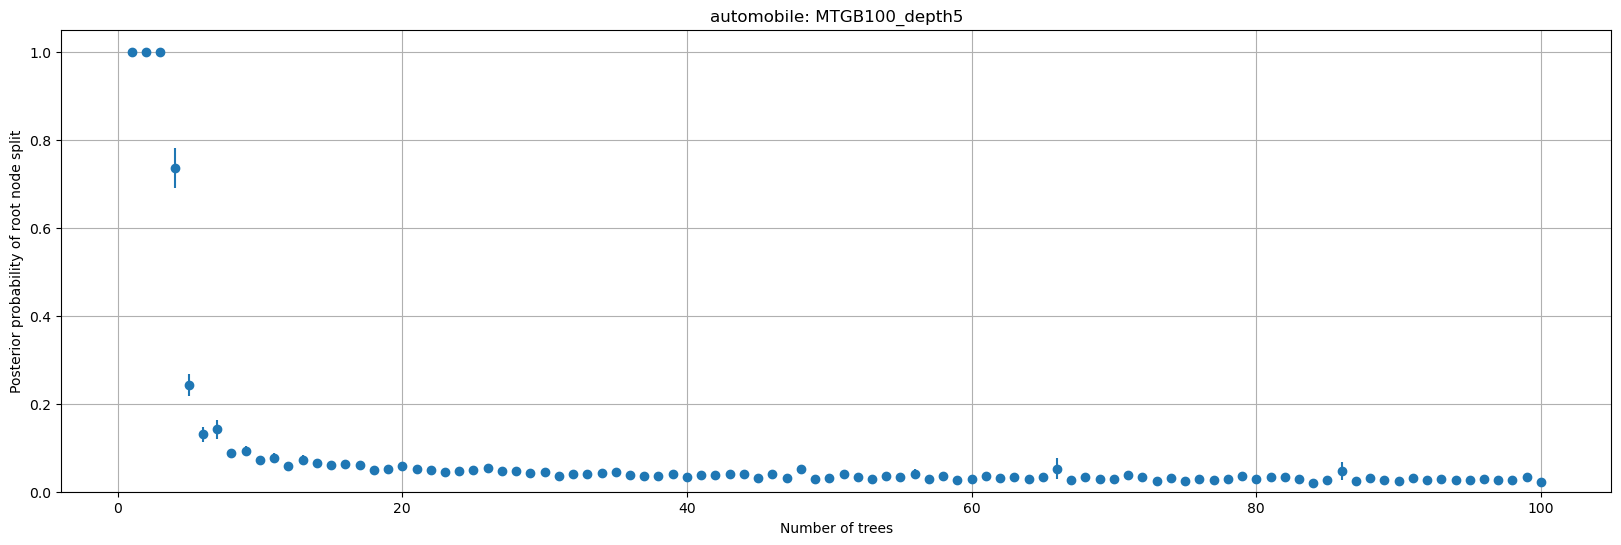

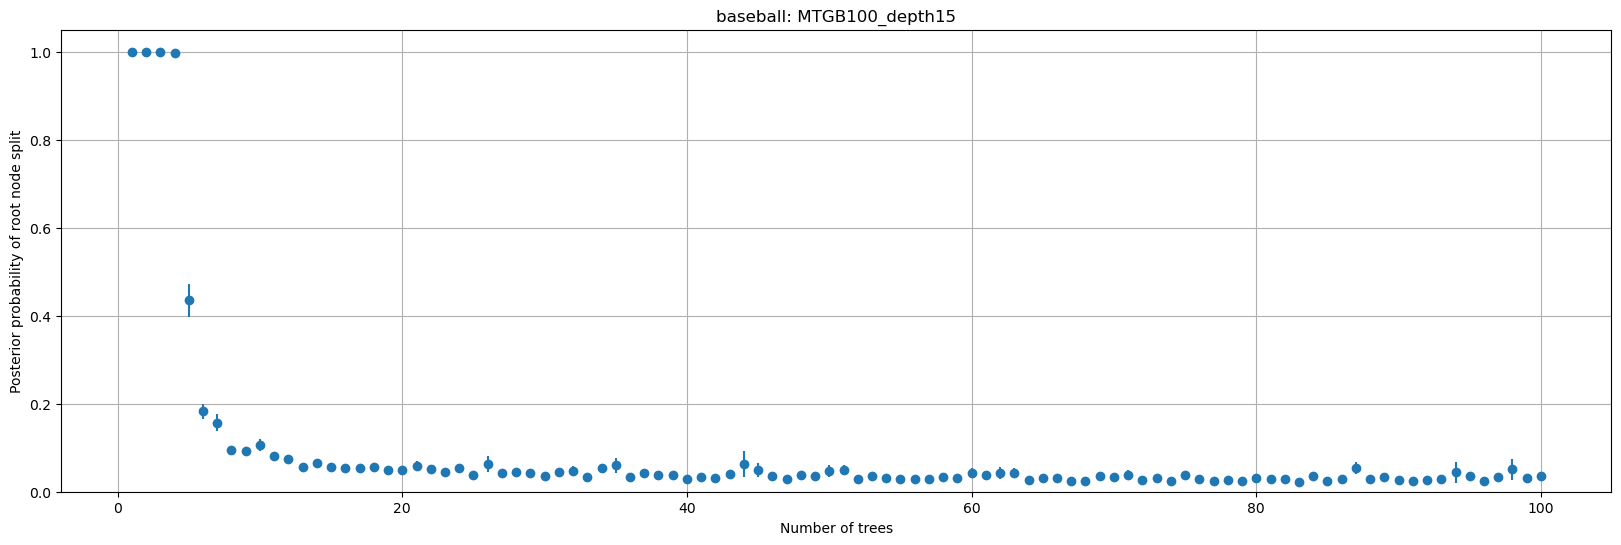

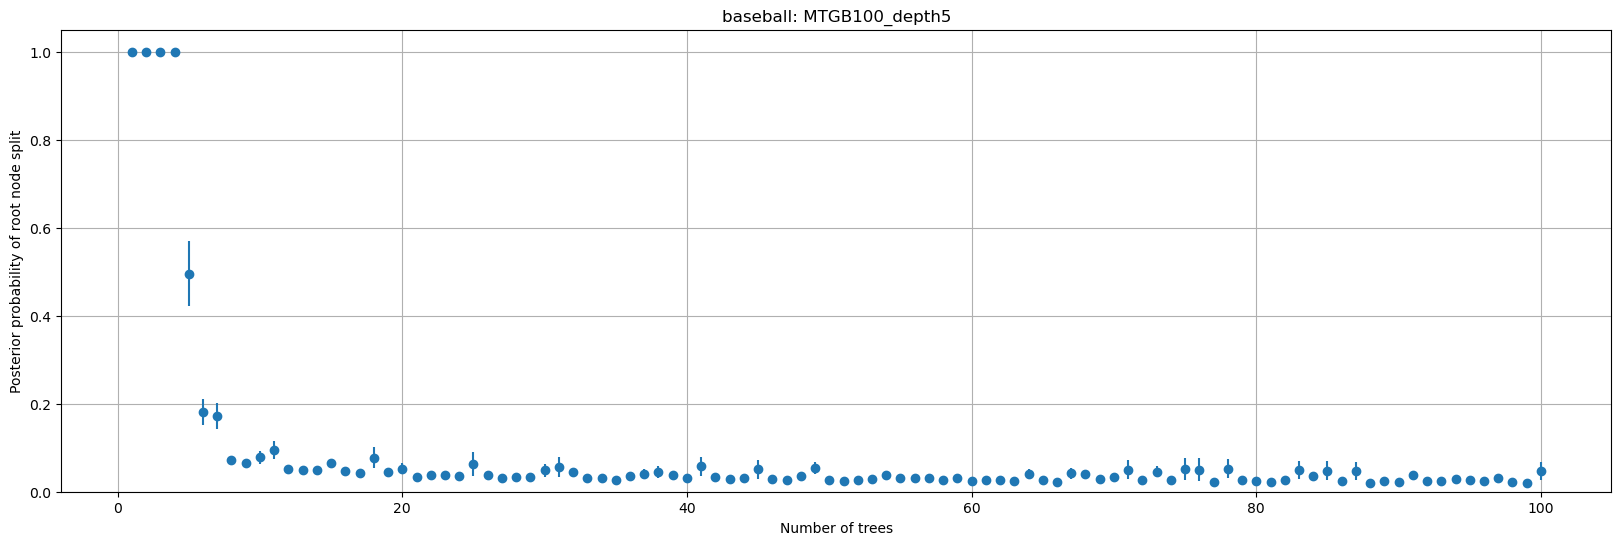

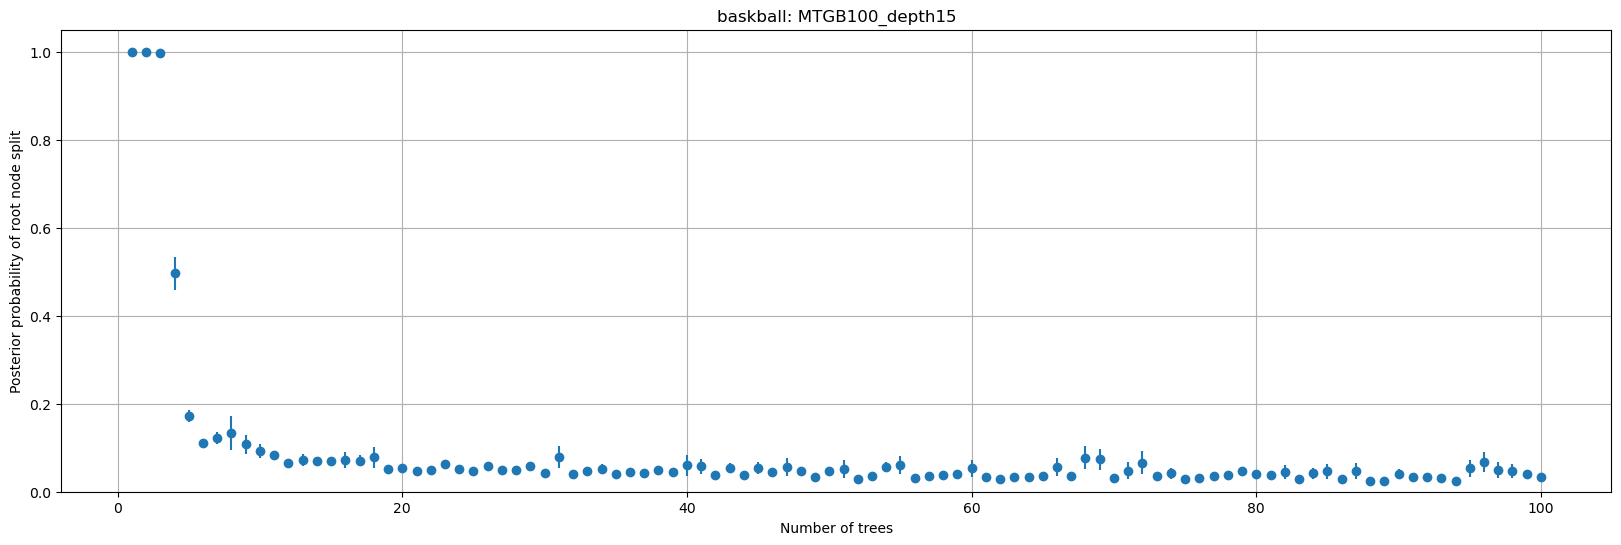

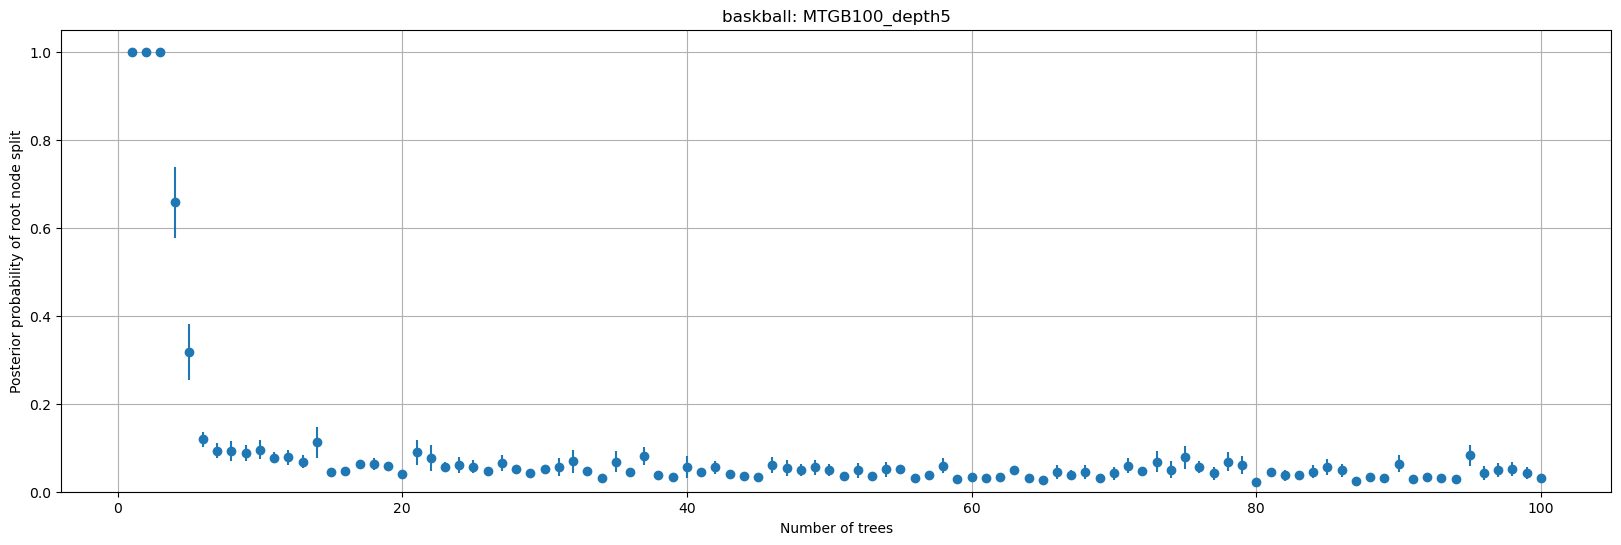

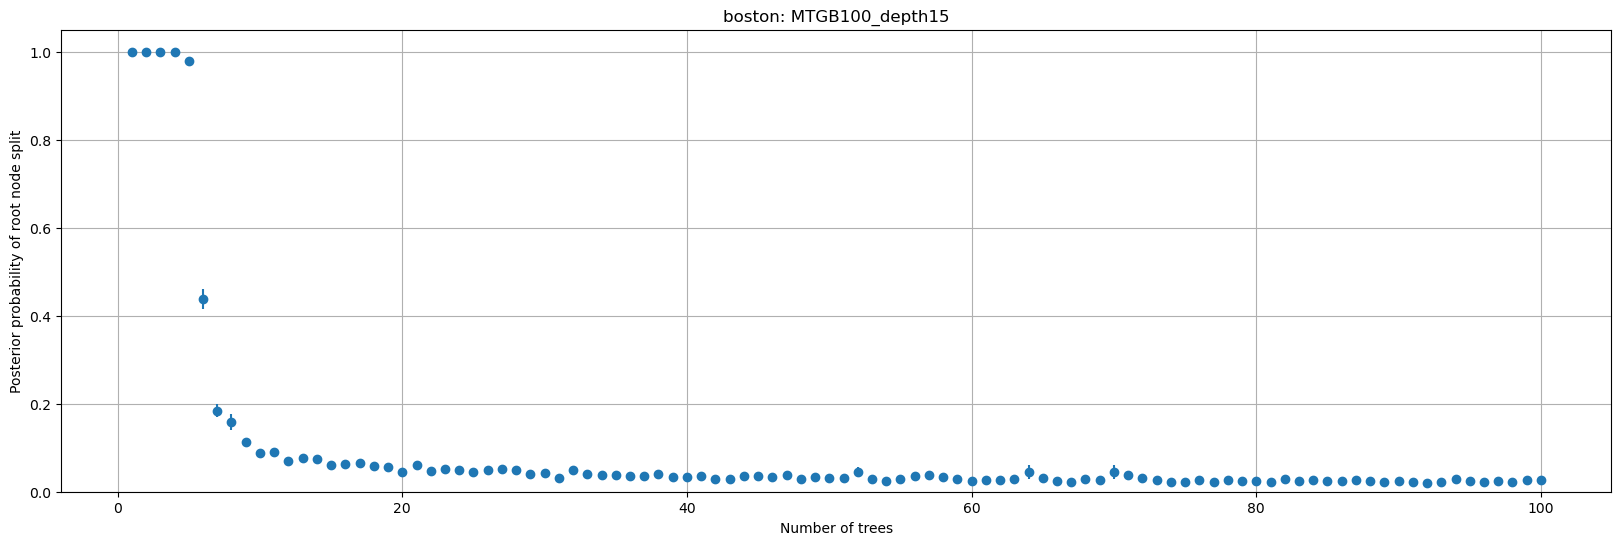

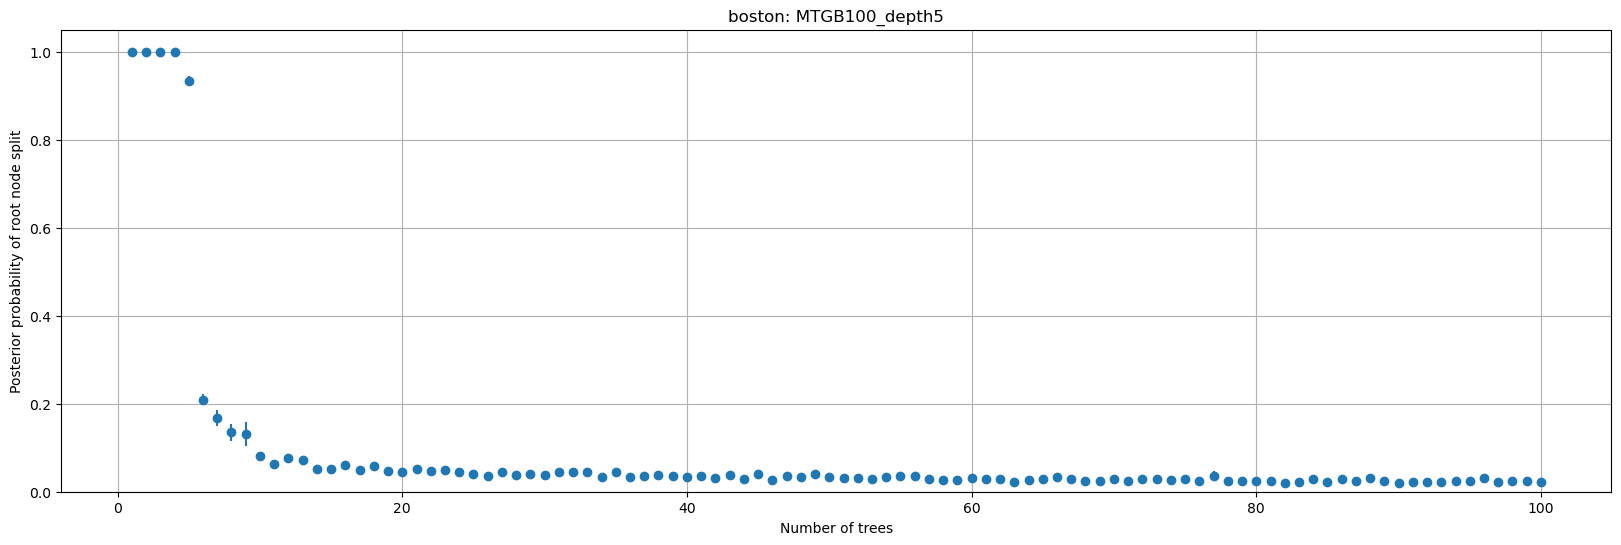

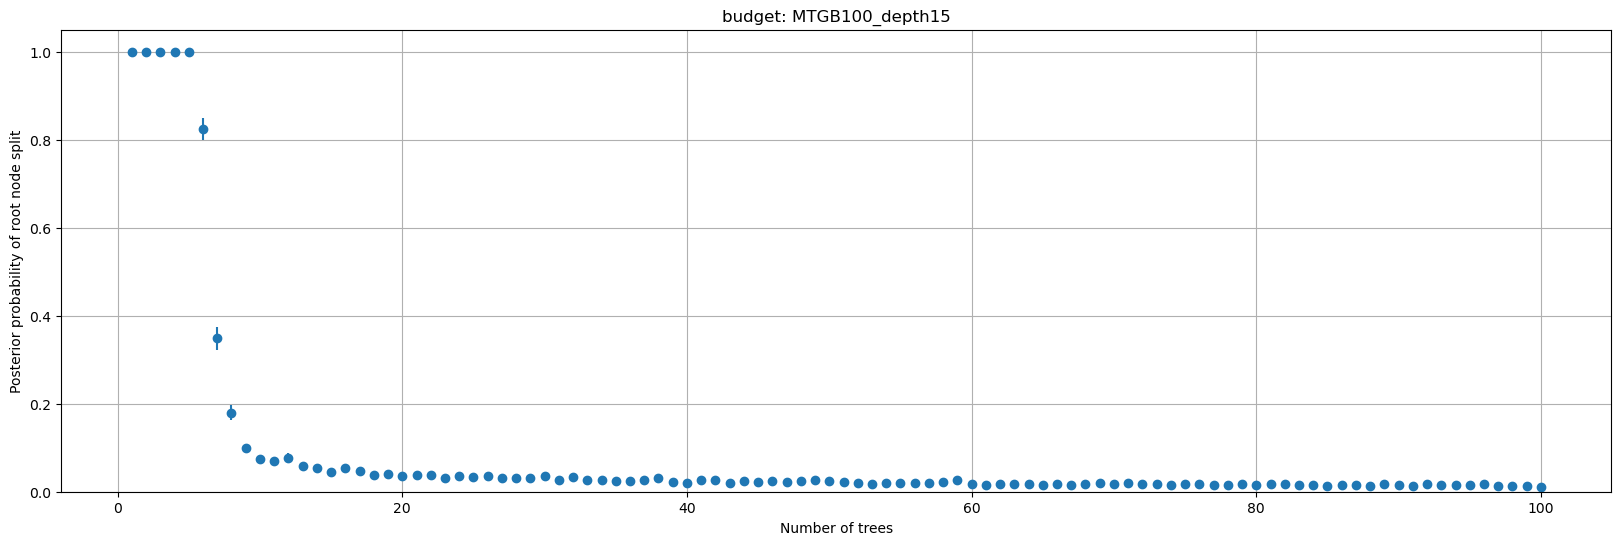

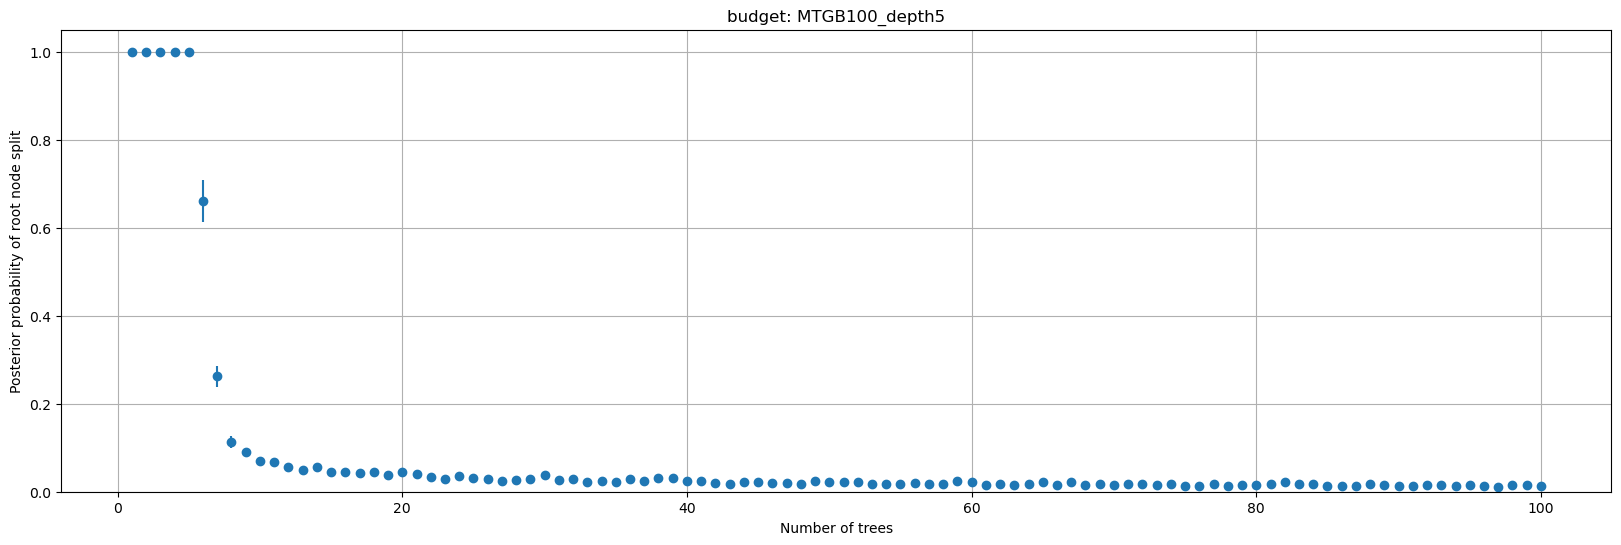

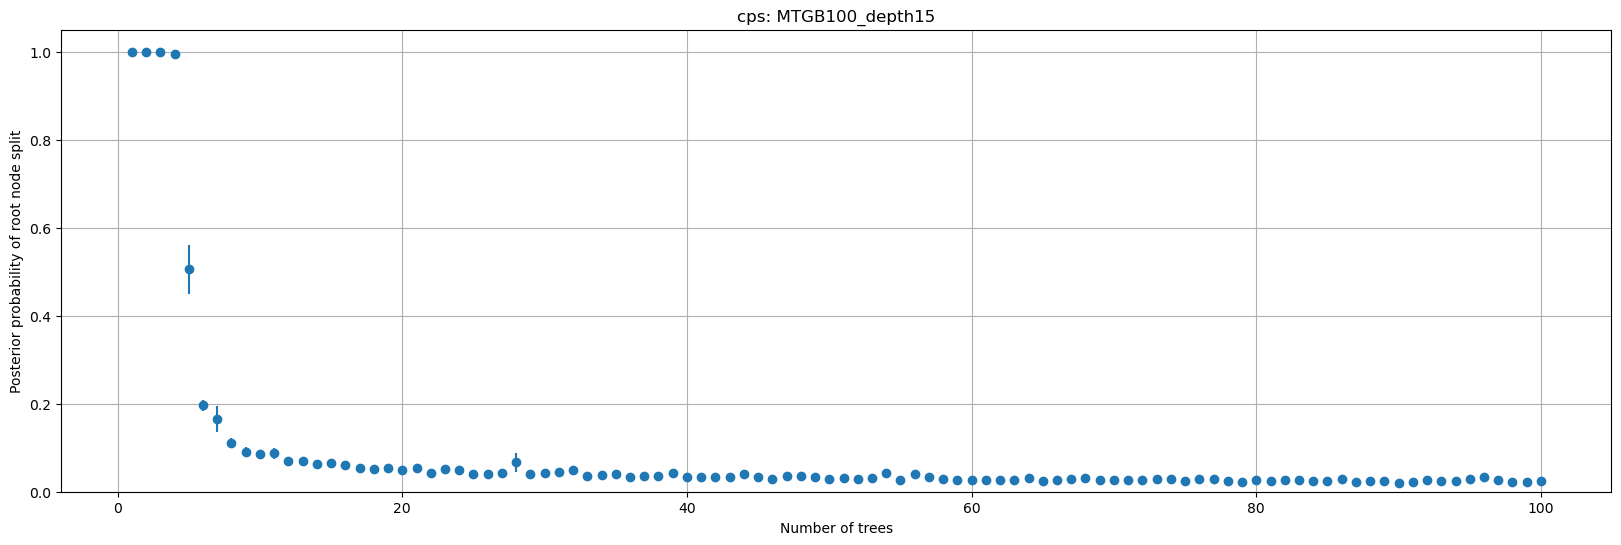

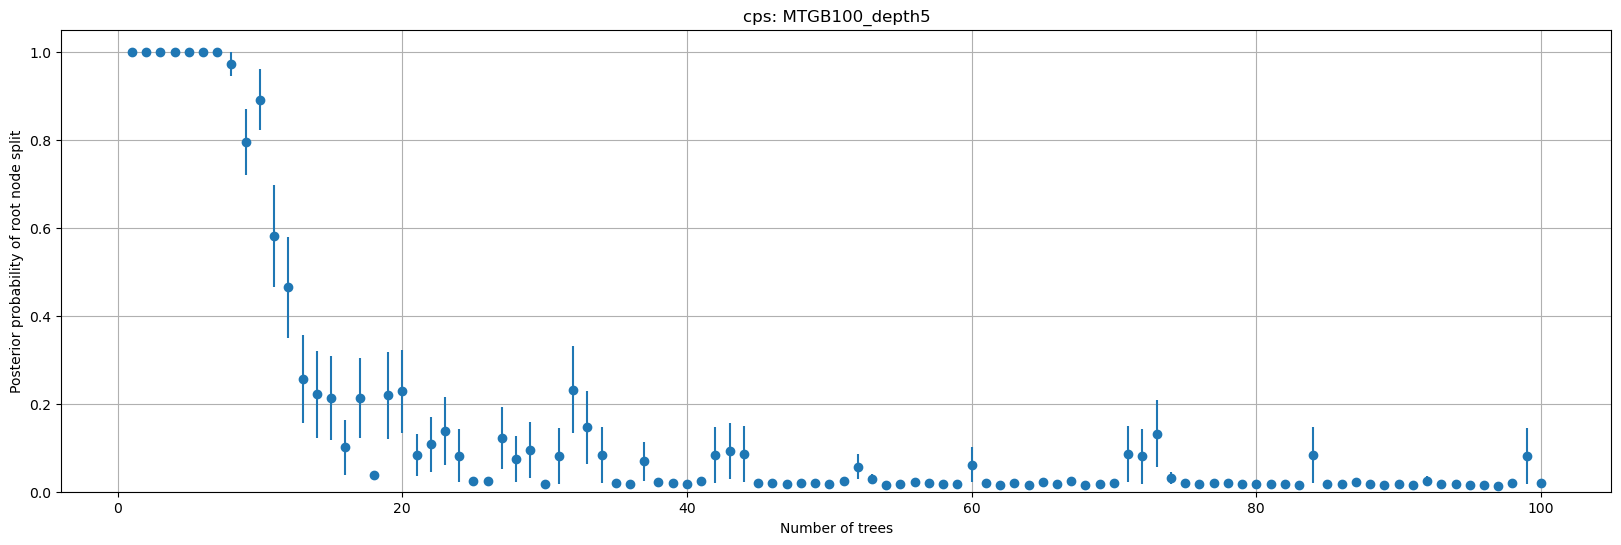

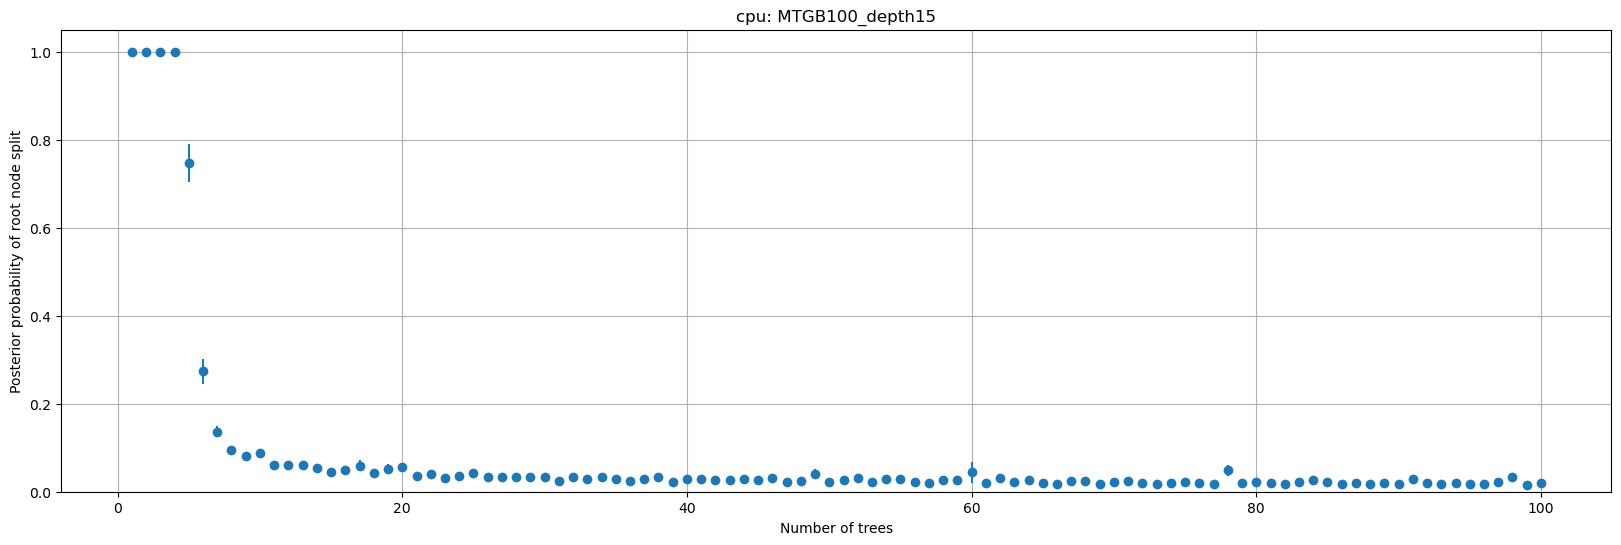

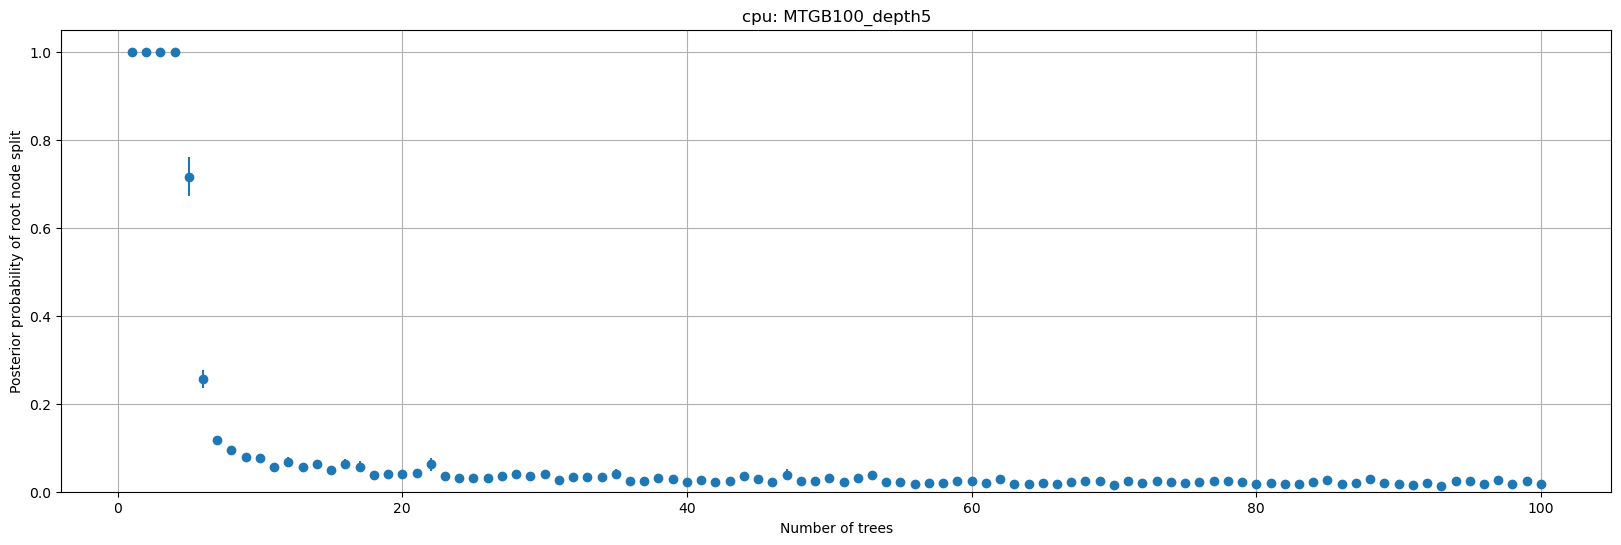

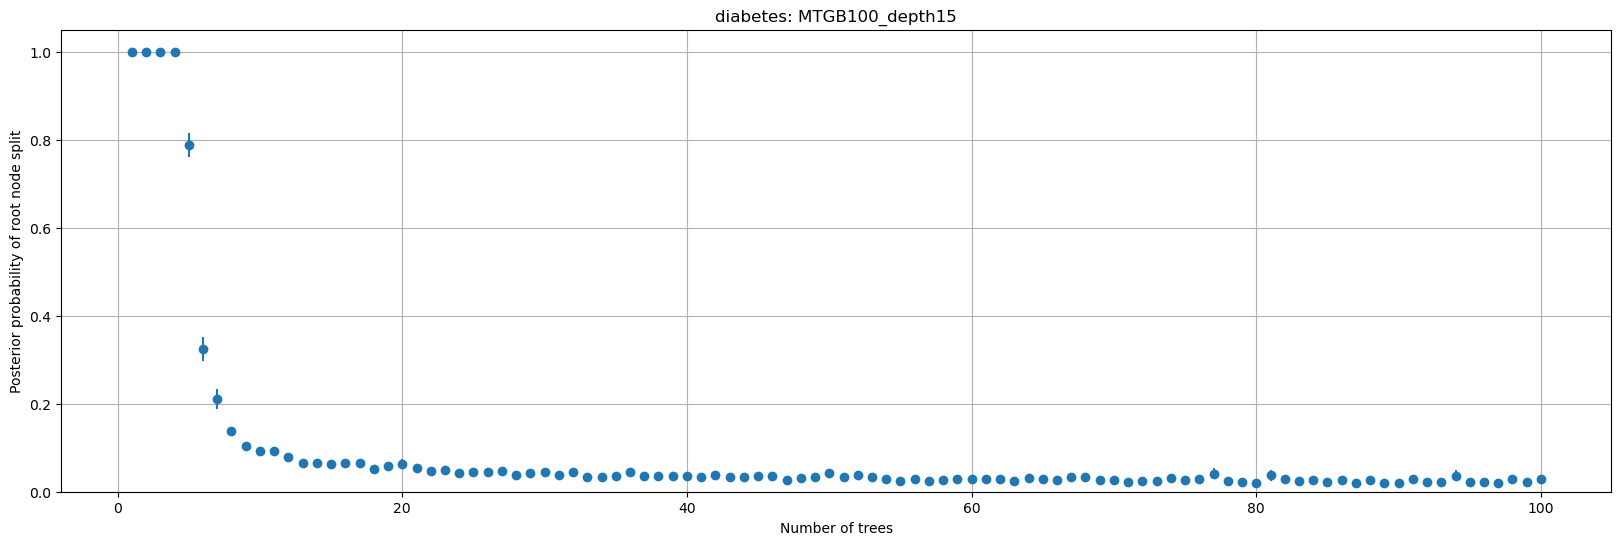

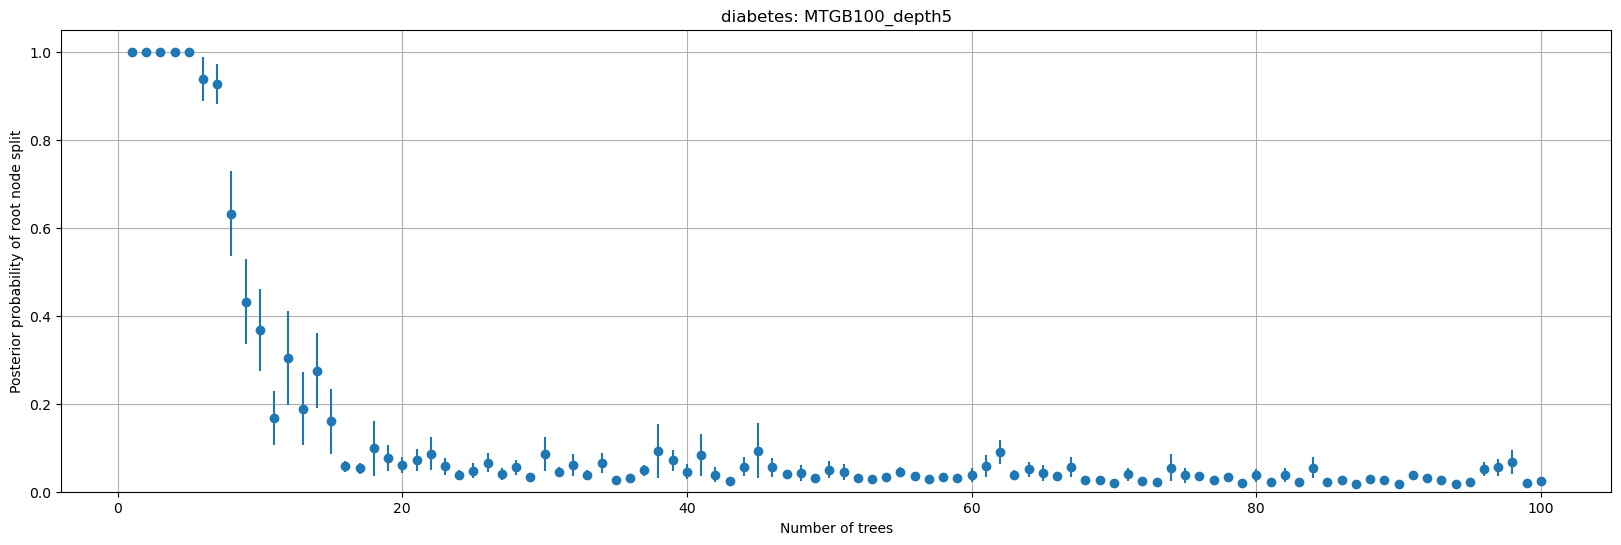

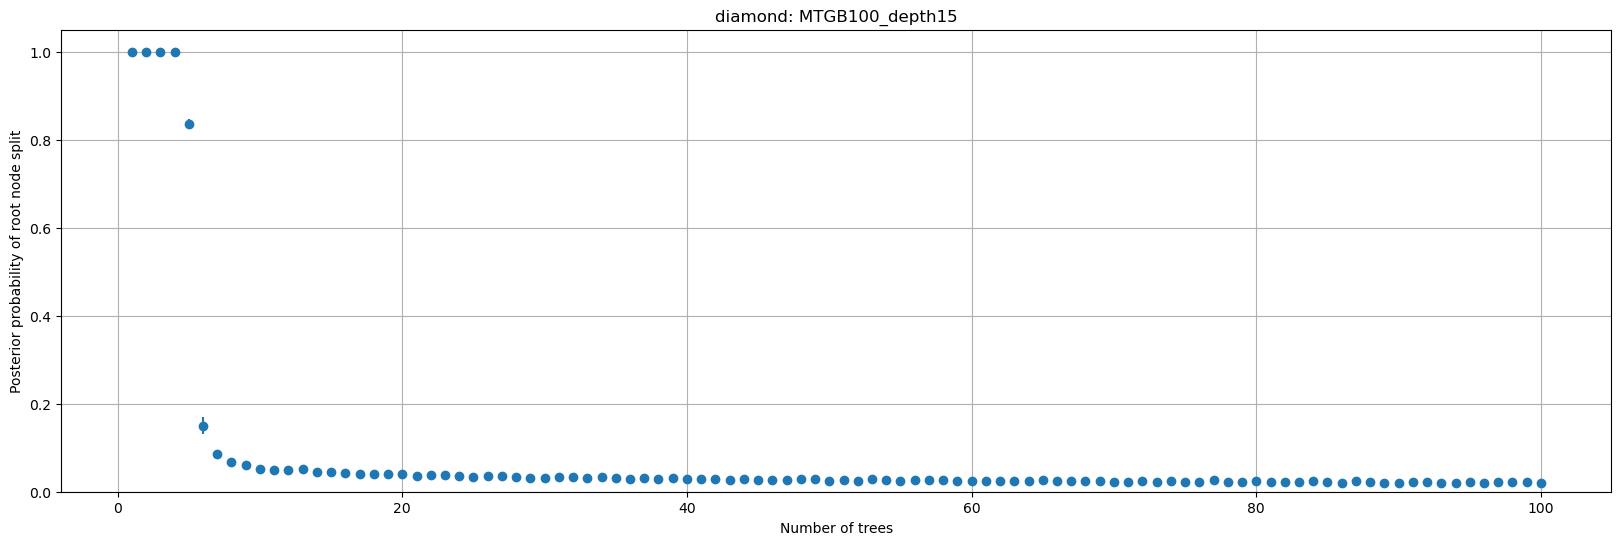

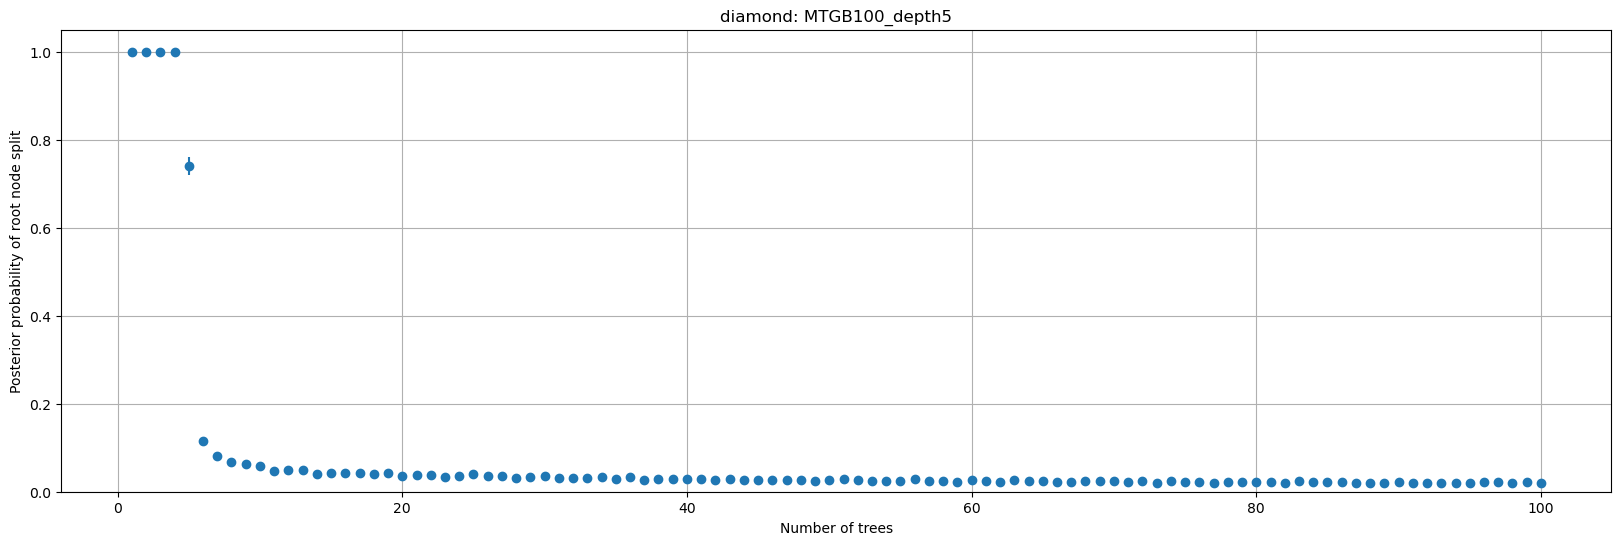

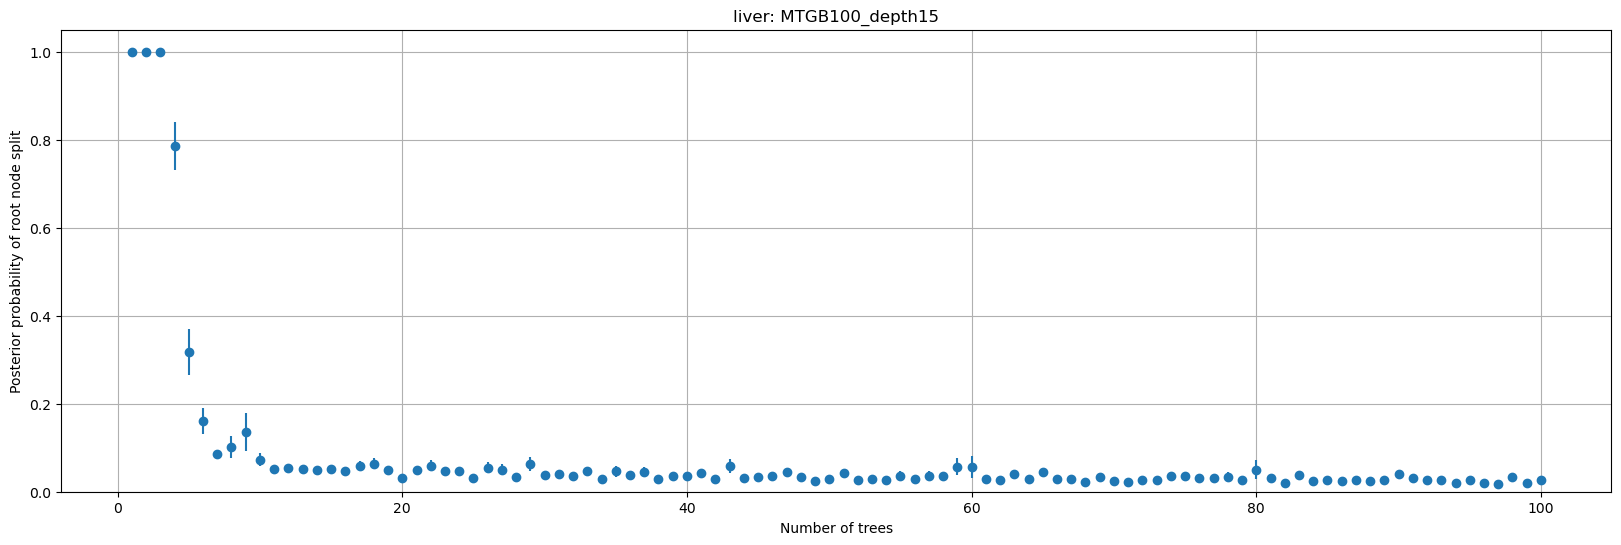

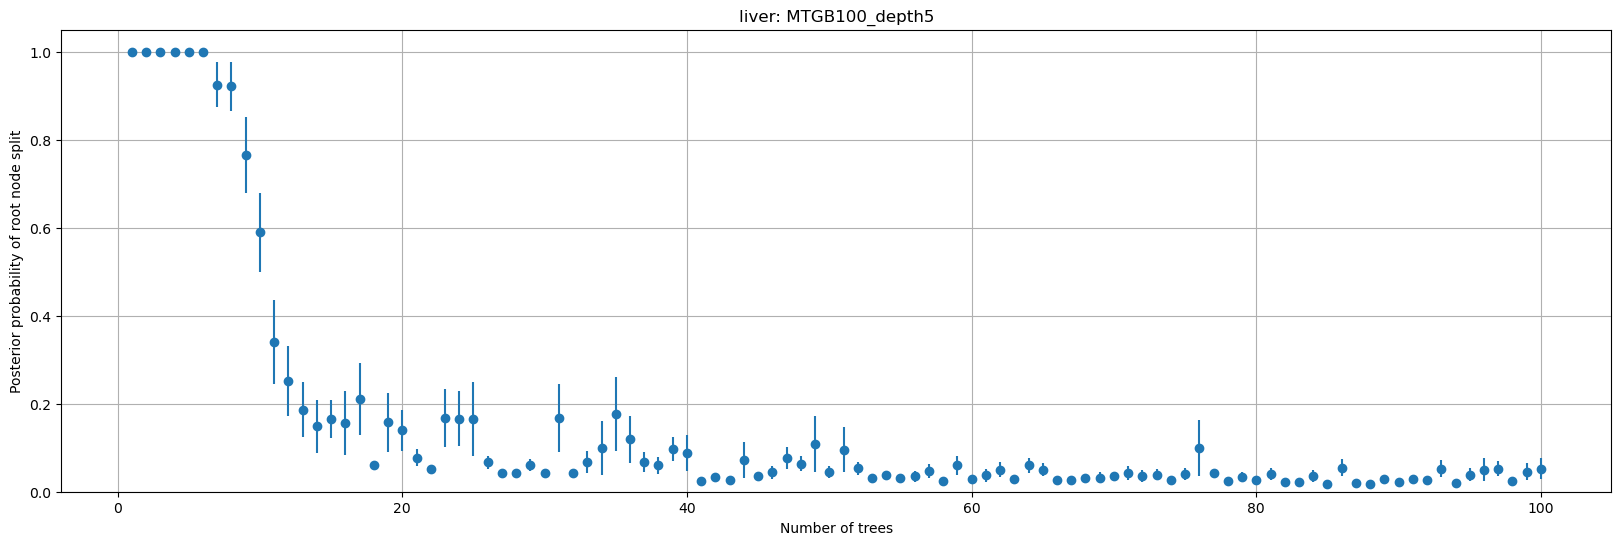

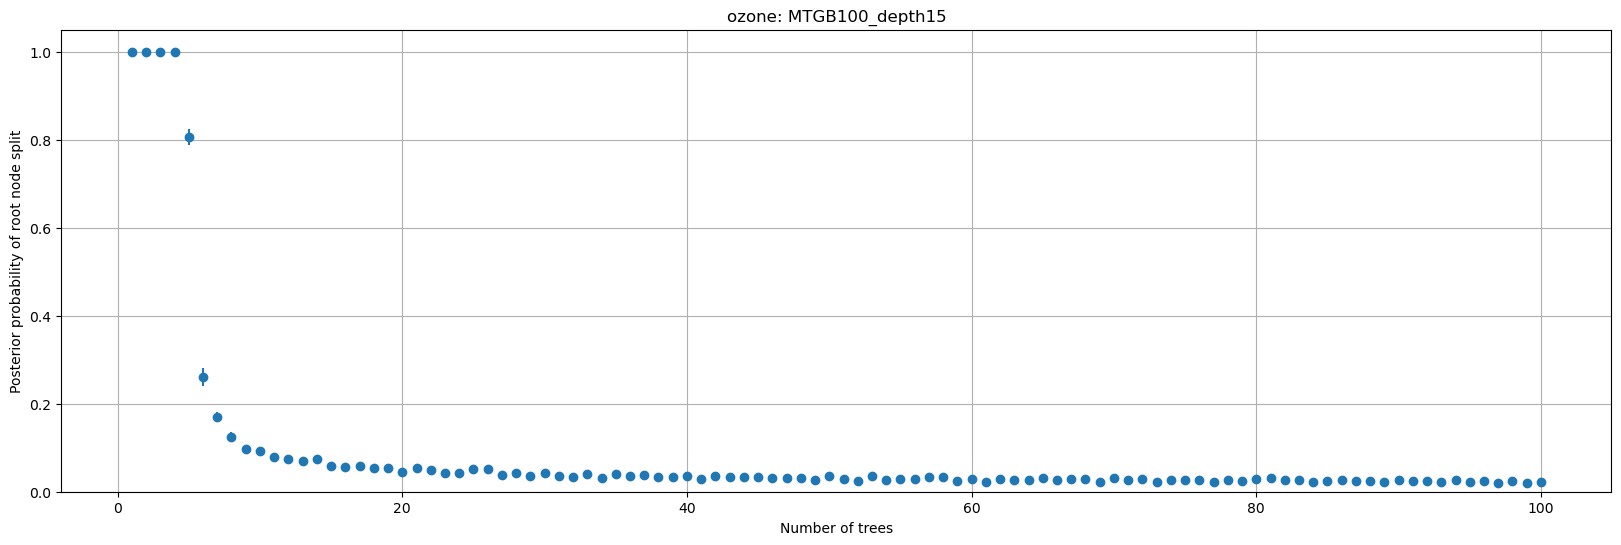

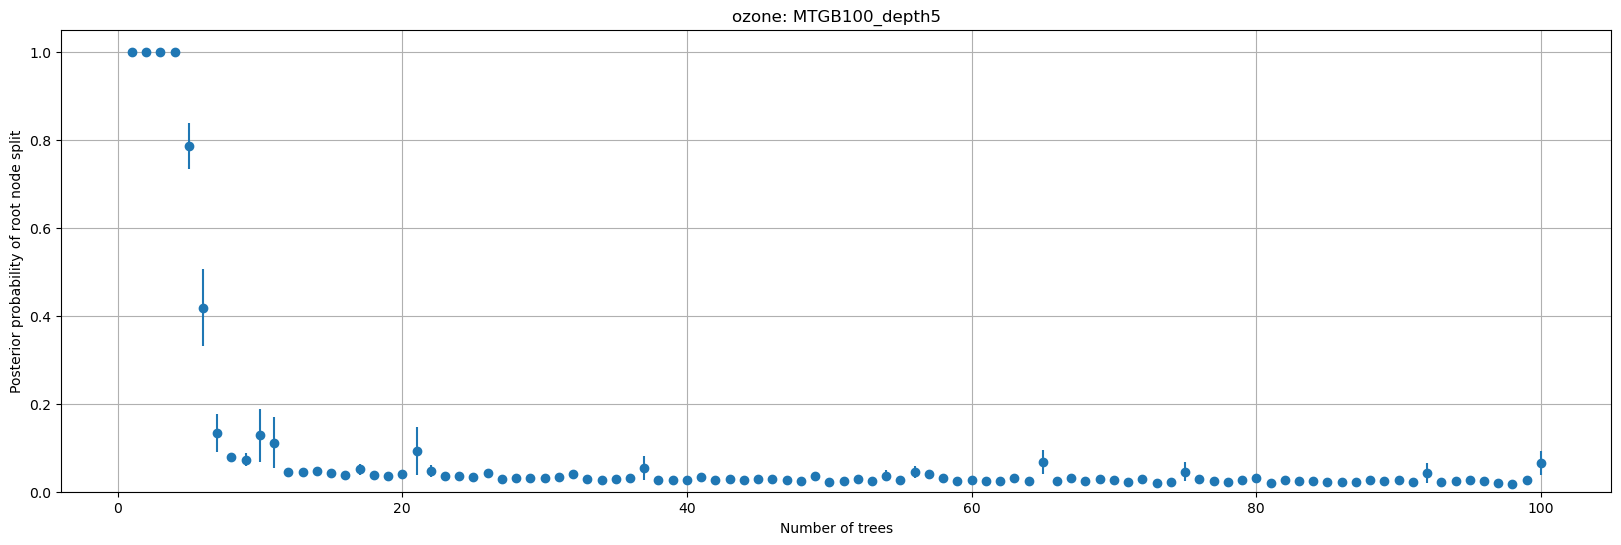

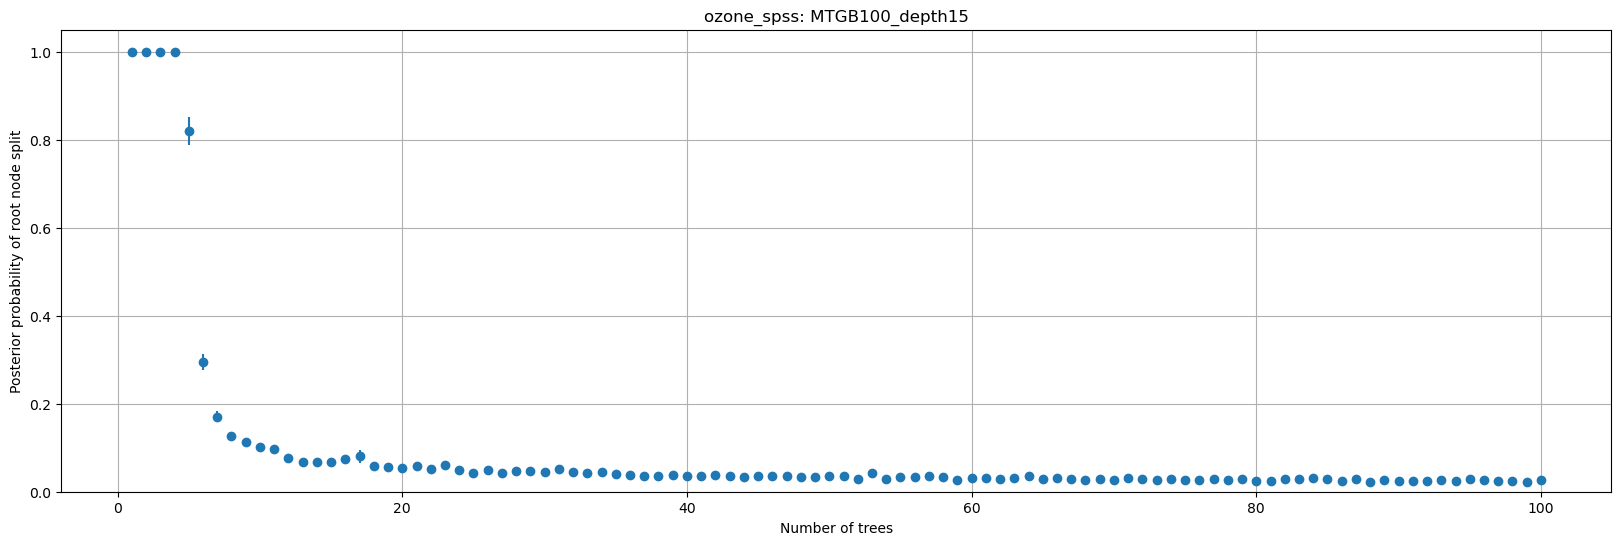

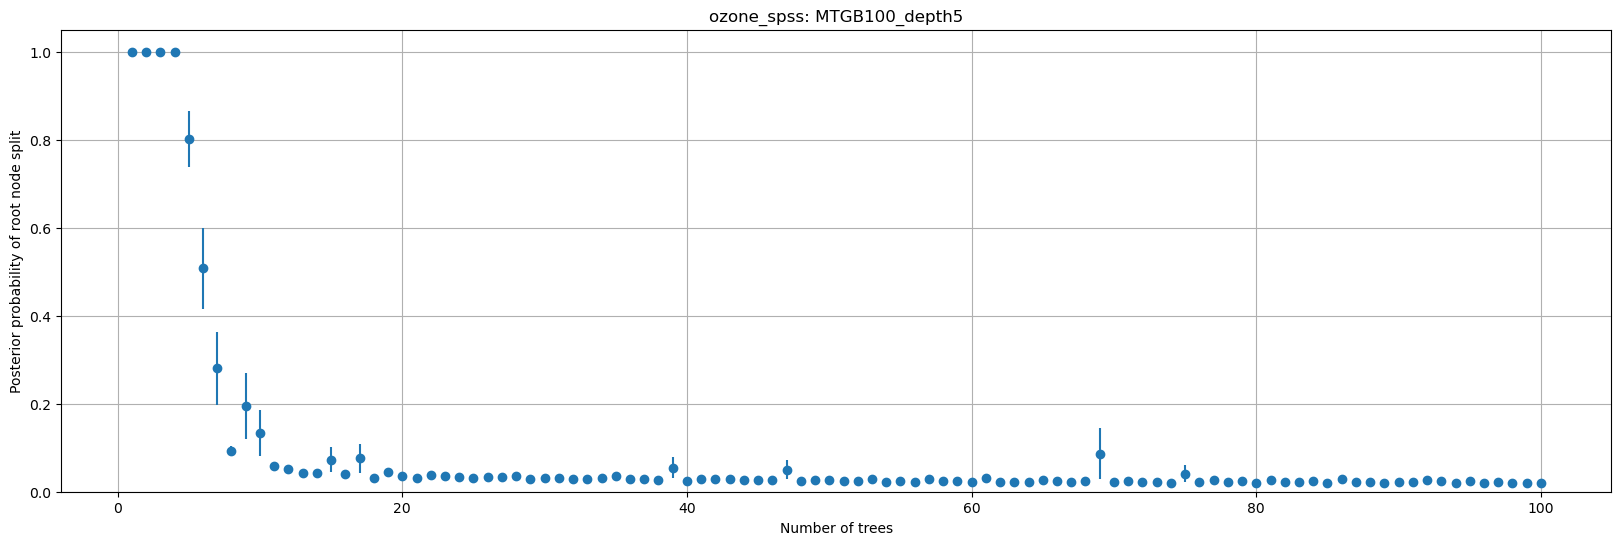

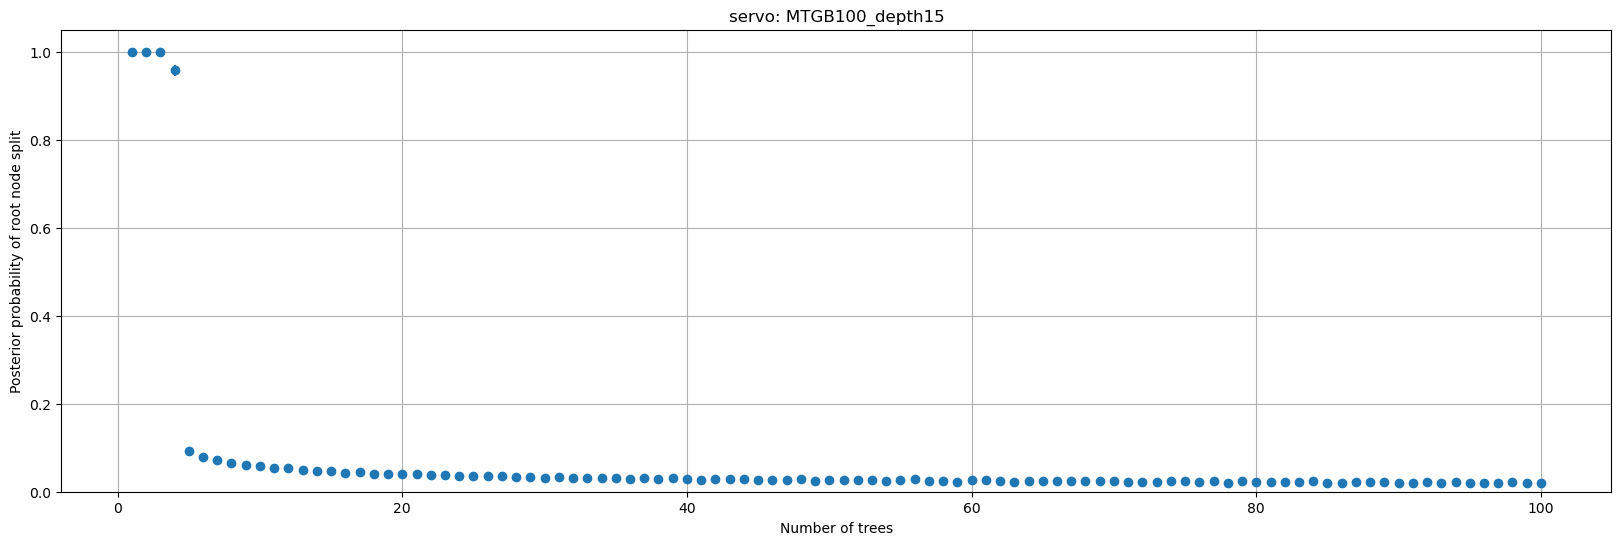

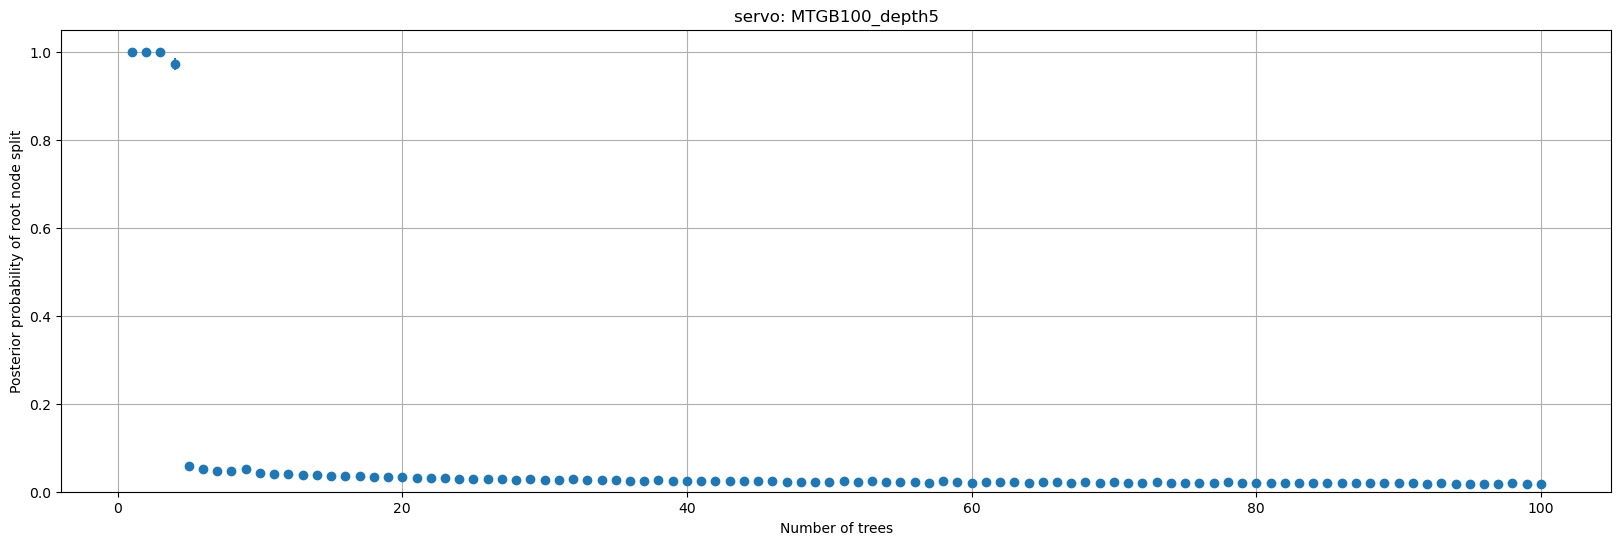

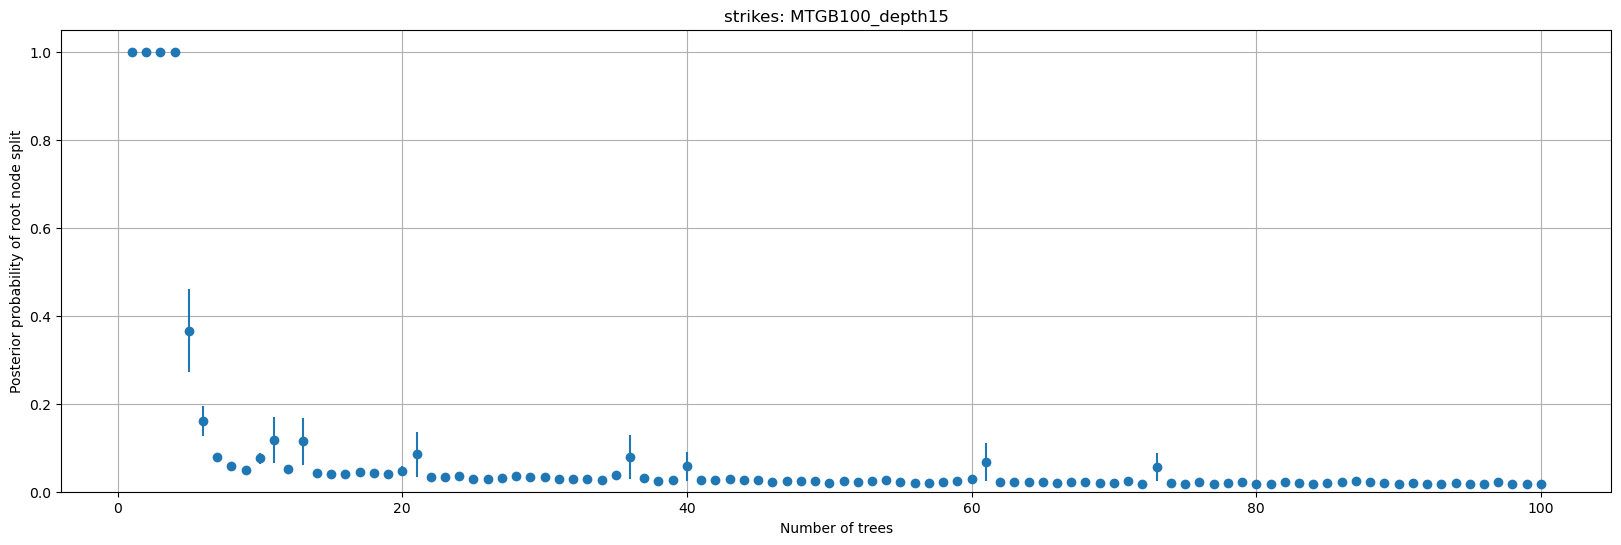

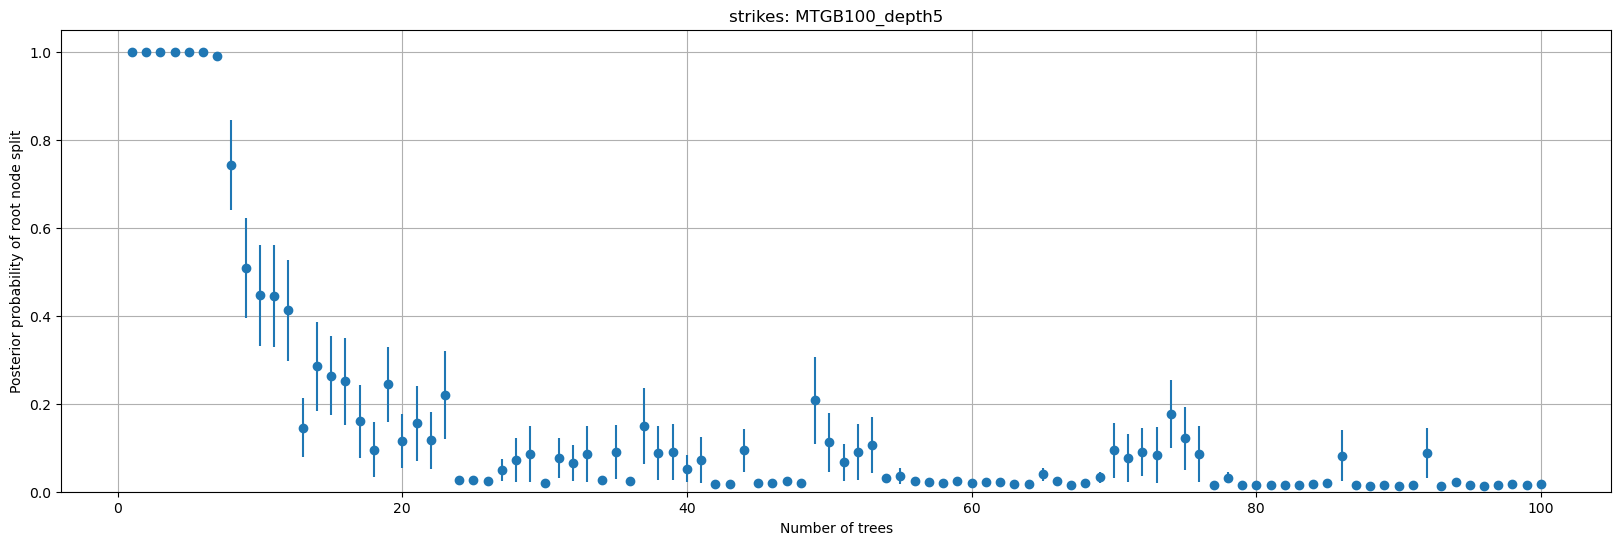

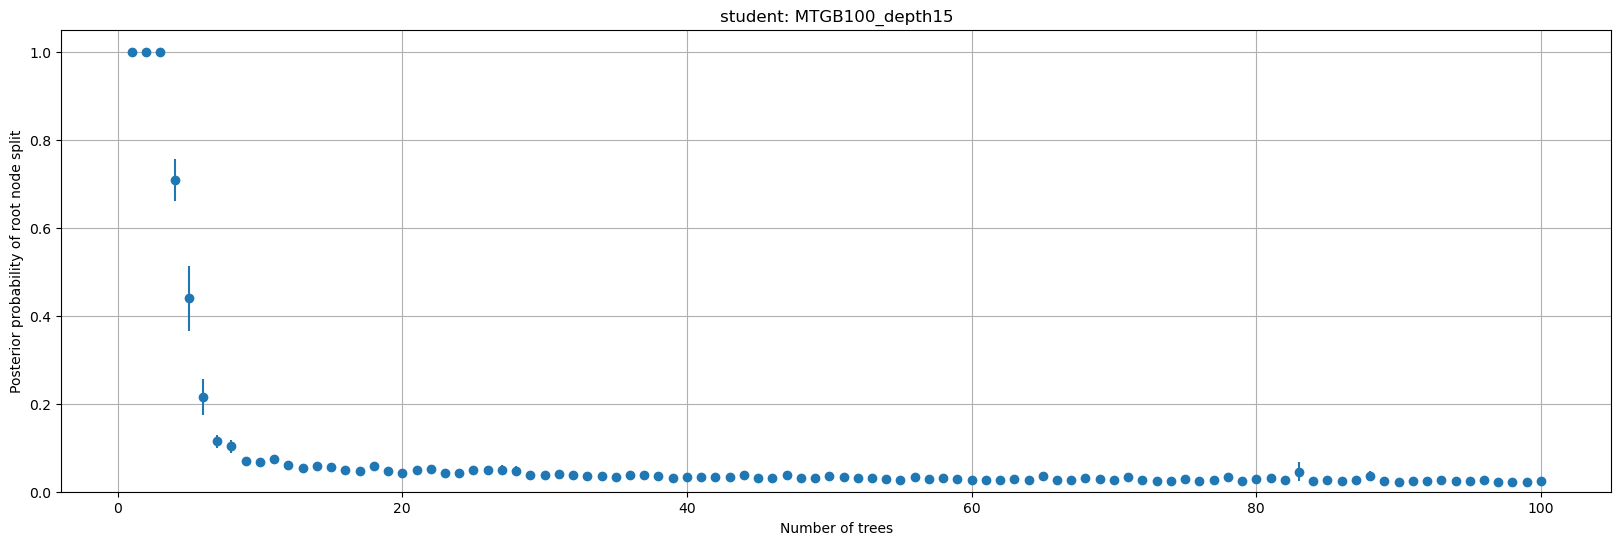

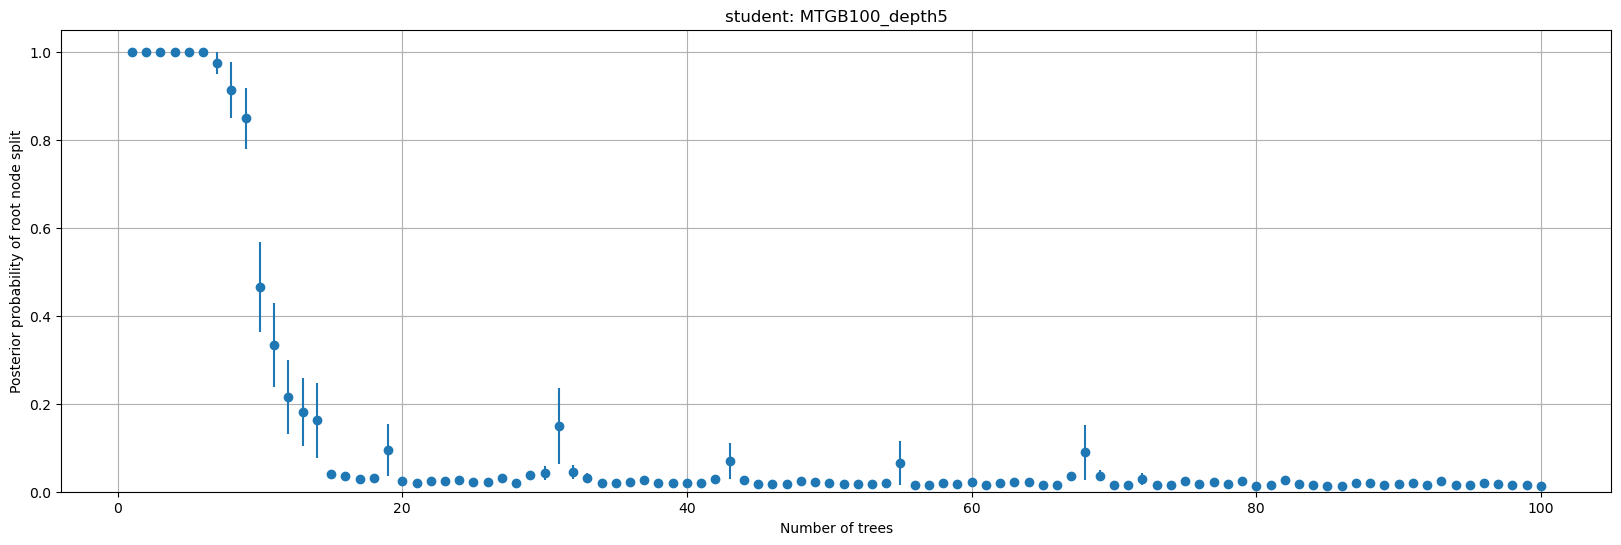

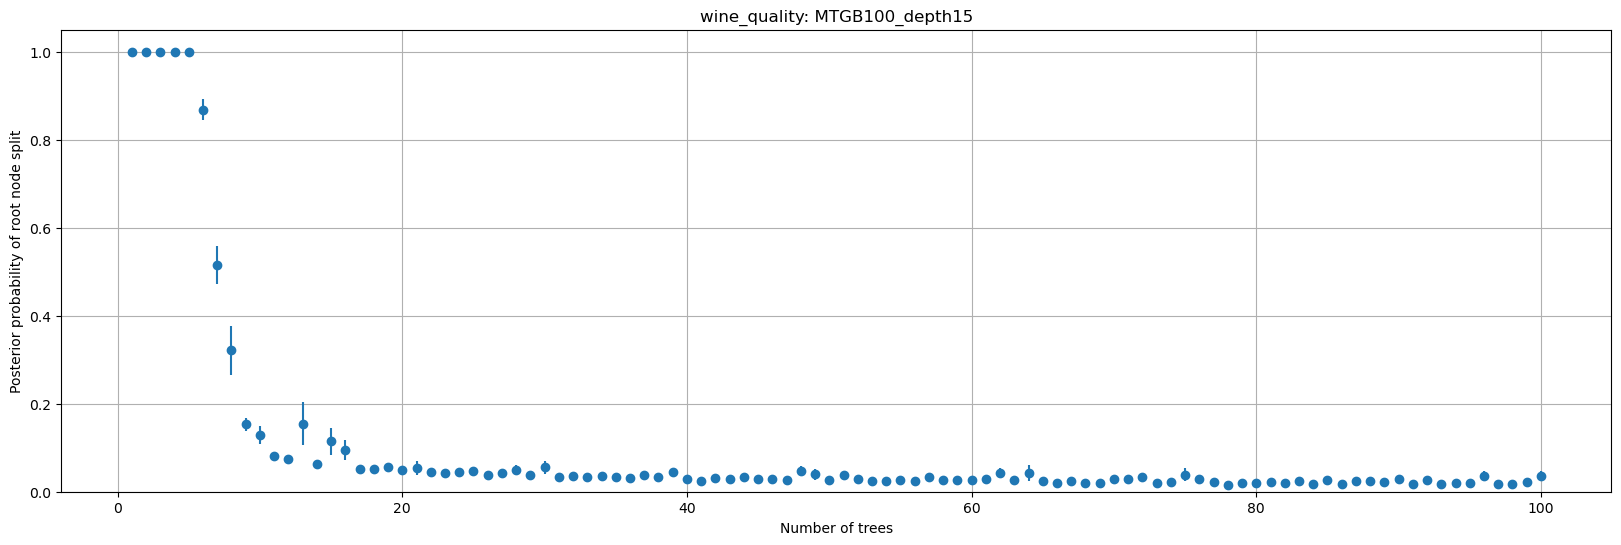

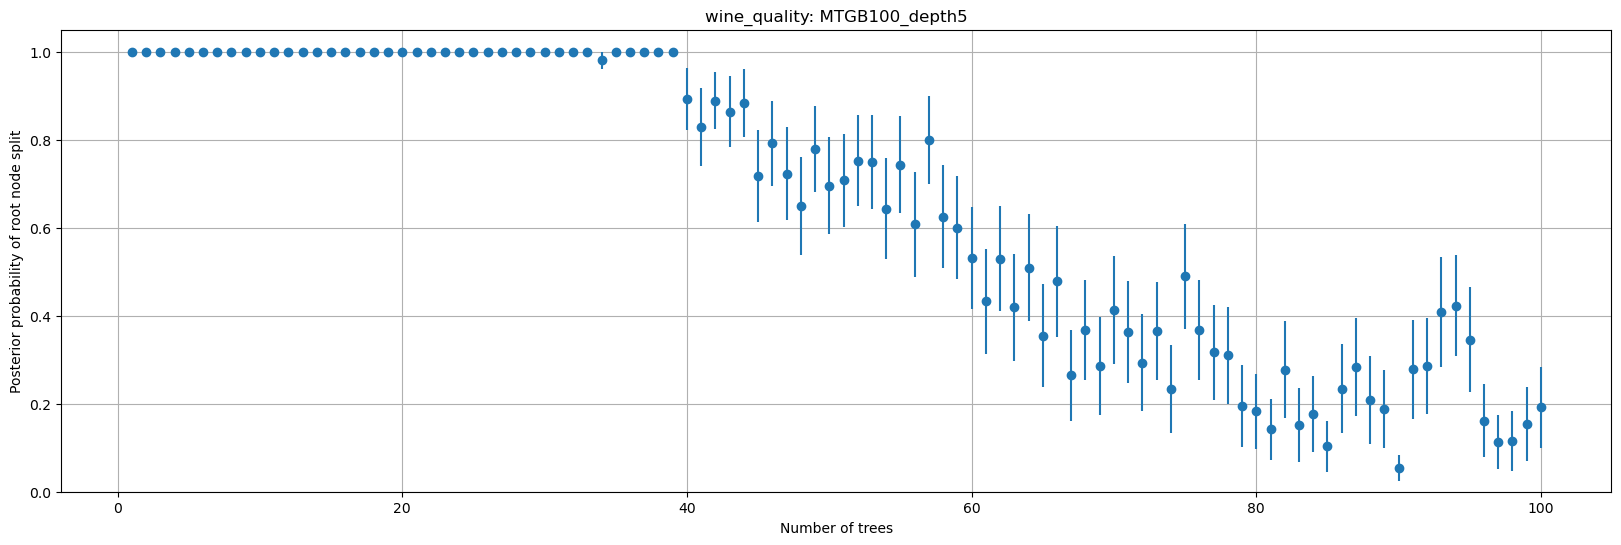

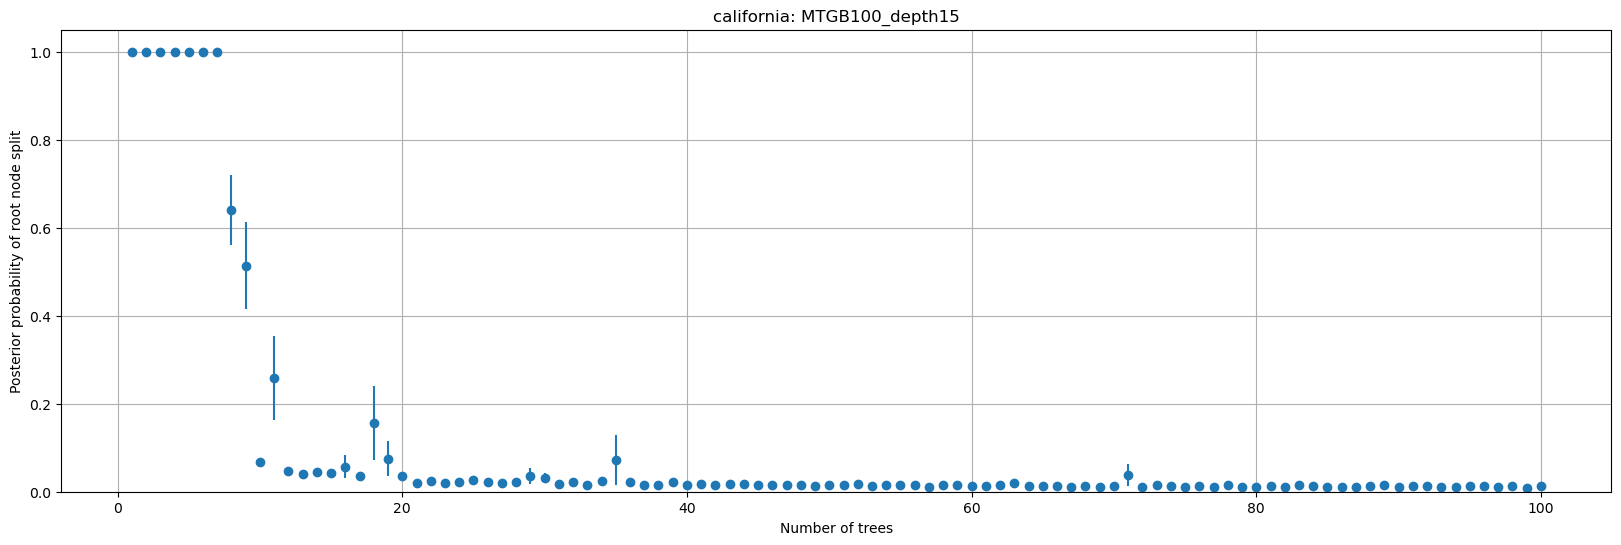

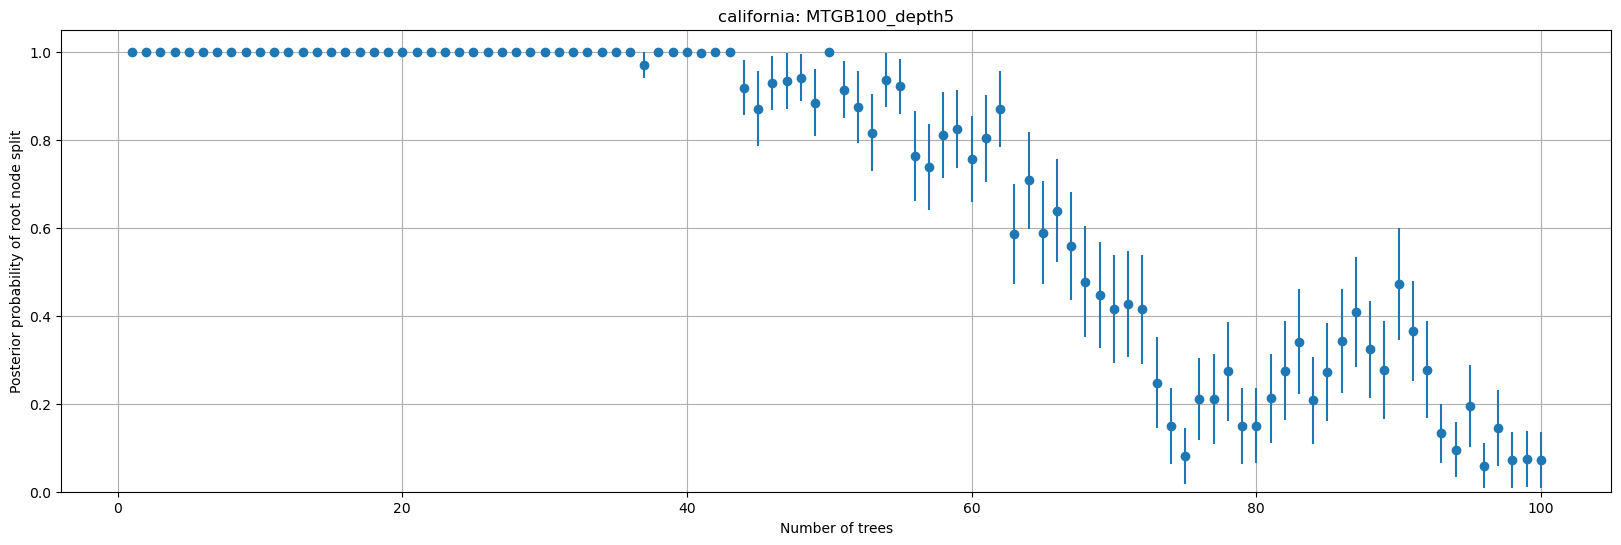

In [20]:
for data_name in DATA_NAMES:
    for modelname in ['MTGB100_depth15', 'MTGB100_depth5']:
        if root_split_proba_stats[data_name][modelname] is not None:
            plot_root_split_proba(data_name, modelname)

In [ ]:
assert False

AssertionError: 

In [21]:
df1.to_csv(FILE_DIR / 'df_error_benchmark_modelwise.csv')
df2.to_csv(FILE_DIR / 'df_error_benchmark_errorwise.csv')